In [1]:
#importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing datasets
# 'feature' dataset consist of the main data through which we will predict the target variable 
# The 'power' dataset consist of 2 columns from which 1 column is the Power column which is the target feature for the feature dataset.
feature=pd.read_csv('features.csv')
power=pd.read_csv('power.csv')

In [3]:
# merging 2 dataset using inner join and on the Timestamp column as it is the common column
# By merging the 2 datasets we will get 136730 rows
df=pd.merge(feature,power,how='inner',on='Timestamp')

In [4]:
#set_option is used to display all the columns in a dataset
pd.set_option('display.max_columns',None)
df.sample(5)

,Timestamp,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,Gearbox_Oil-1_Temperature,Gearbox_Oil_Temperature,Torque,Converter Control Unit Reactive Power,Temperature Trafo-2,Reactive Power,Temperature Shaft Bearing-1,Gearbox_Distributor_Temperature,Moment D Filtered,Moment D Direction,N-set 1,Operating State,Power Factor,Temperature Shaft Bearing-2,Temperature_Nacelle,Voltage A-N,Temperature Axis Box-3,Voltage C-N,Temperature Axis Box-2,Temperature Axis Box-1,Voltage B-N,Nacelle Position_Degree,Converter Control Unit Voltage,Temperature Battery Box-3,Temperature Battery Box-2,Temperature Battery Box-1,Hydraulic Prepressure,Angle Rotor Position,Temperature Tower Base,Pitch Offset-2 Asymmetric Load Controller,Pitch Offset Tower Feedback,Line Frequency,Internal Power Limit,Circuit Breaker cut-ins,Particle Counter,Tower Accelaration Normal Raw,Torque Offset Tower Feedback,External Power Limit,Blade-2 Actual Value_Angle-B,Blade-1 Actual Value_Angle-B,Blade-3 Actual Value_Angle-B,Temperature Heat Exchanger Converter Control Unit,Tower Accelaration Lateral Raw,Temperature Ambient,Nacelle Revolution,Pitch Offset-1 Asymmetric Load Controller,Tower Deflection,Pitch Offset-3 Asymmetric Load Controller,Wind Deviation 1 seconds,Wind Deviation 10 seconds,Proxy Sensor_Degree-135,State and Fault,Proxy Sensor_Degree-225,Blade-3 Actual Value_Angle-A,Scope CH 4,Blade-2 Actual Value_Angle-A,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
4807,2019-02-03 12:40:00,61.000000,63.000000,57.001667,61.000000,72.983559,61.000000,35.975517,35.419998,57.018333,61.000000,59.503334,59.503334,38.011951,NaN,66.0,-211.993332,NaN,54.146667,382.980804,383.978485,1735.000000,16.000000,-0.958799,31.00,28.985001,395.083344,26.000000,392.493347,28.000000,29.0,392.853333,154.711670,682.479980,19.0,NaN,19.0,79.173378,181.163528,23.000000,0.000000,0.000000,49.982300,2780.0,396.0,0.0,2.289147,0.783892,3300.0,0.0,99999.0,0.0,28.000000,-1.734689,14.011666,0.638088,0.000000,3138.0,0.000000,-3.246667,-3.240000,5.919027,2.0,6.027682,-0.391047,-0.391047,0.295229,0.095384,0.286586,0.000000,0.096677,-0.383261,146.472092,145.165436,5.699483,1.000000,NaN,790.375000
126177,2021-06-02 02:30:00,46.290001,49.221668,45.000000,51.106667,19.334709,49.008335,18.857817,33.619999,55.000000,51.106667,49.261665,49.261665,-3.251700,-20.424999,64.0,-33.771667,34.0,47.183334,90.896446,NaN,706.469543,15.173333,-0.999990,29.98,23.926666,395.096680,26.000000,392.420013,26.000000,30.0,392.850006,254.663330,683.716675,20.0,20.0,20.0,77.020157,180.520813,23.128334,0.000000,0.000000,49.982635,2780.0,624.0,1.0,2.295744,0.183238,3300.0,0.0,0.0,0.0,34.000000,-1.781036,13.713333,-0.084269,0.000000,3181.0,0.000000,-7.760000,-7.923333,5.917480,99999.0,5.940428,3.129974,3.129974,3.368057,3.258029,3.367635,3.252339,3.258623,3.130509,33.854488,34.071831,5.831979,2.653333,5.873200,-23.176666
15161,2019-04-17 13:50:00,44.011665,44.958332,NaN,42.231667,66.280174,43.016666,42.896778,28.868334,50.000000,42.235001,40.775002,40.775002,29.810316,-11.205000,58.0,-21.700001,27.0,42.036667,-77.559792,-75.473961,1735.000000,16.000000,-0.998877,23.00,26.801666,400.718323,22.000000,398.785004,22.000000,24.0,NaN,2.588333,692.883362,16.0,16.0,16.0,70.166451,180.826981,23.861666,0.000000,0.000000,49.983368,2780.0,407.0,0.0,2.618996,NaN,3300.0,0.0,0.0,0.0,28.299999,-2.032632,14.366667,0.215523,0.000000,3137.0,0.000000,6.555000,6.155000,5.872036,2.0,5.900516,-0.344814,-0.344814,0.157767,0.181442,0.160554,0.000000,0.182112,-0.342665,-5.059134,-5.394541,5.8

In [5]:
df.shape

(136730, 78)

In [6]:
#Timestamp column is not an important feature in predicting the power, therefore it has been dropped
df_train=df.drop('Timestamp',axis=1)

In [7]:
df_train.head()

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,Gearbox_Oil-1_Temperature,Gearbox_Oil_Temperature,Torque,Converter Control Unit Reactive Power,Temperature Trafo-2,Reactive Power,Temperature Shaft Bearing-1,Gearbox_Distributor_Temperature,Moment D Filtered,Moment D Direction,N-set 1,Operating State,Power Factor,Temperature Shaft Bearing-2,Temperature_Nacelle,Voltage A-N,Temperature Axis Box-3,Voltage C-N,Temperature Axis Box-2,Temperature Axis Box-1,Voltage B-N,Nacelle Position_Degree,Converter Control Unit Voltage,Temperature Battery Box-3,Temperature Battery Box-2,Temperature Battery Box-1,Hydraulic Prepressure,Angle Rotor Position,Temperature Tower Base,Pitch Offset-2 Asymmetric Load Controller,Pitch Offset Tower Feedback,Line Frequency,Internal Power Limit,Circuit Breaker cut-ins,Particle Counter,Tower Accelaration Normal Raw,Torque Offset Tower Feedback,External Power Limit,Blade-2 Actual Value_Angle-B,Blade-1 Actual Value_Angle-B,Blade-3 Actual Value_Angle-B,Temperature Heat Exchanger Converter Control Unit,Tower Accelaration Lateral Raw,Temperature Ambient,Nacelle Revolution,Pitch Offset-1 Asymmetric Load Controller,Tower Deflection,Pitch Offset-3 Asymmetric Load Controller,Wind Deviation 1 seconds,Wind Deviation 10 seconds,Proxy Sensor_Degree-135,State and Fault,Proxy Sensor_Degree-225,Blade-3 Actual Value_Angle-A,Scope CH 4,Blade-2 Actual Value_Angle-A,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
0,57.000000,59.000000,52.000000,56.158333,47.053776,57.000000,18.890772,35.000000,48.576668,56.158333,55.000000,55.000000,35.873798,-205.350006,57.0,-212.126663,28.000000,52.618332,264.949768,265.629913,1735.0,16.0,-0.953030,25.0,20.110001,395.029999,17.715000,392.086670,20.0,20.0,392.413330,10.773334,682.044983,11.0,12.0,11.0,72.210175,181.896973,15.140000,0.000000,0.00000,50.018833,2780.0,395.0,0.0,-0.072567,0.076724,3300.0,0.0,0.0,0.0,24.0,-1.582408,3.976667,-0.761741,0.000000,3138.0,0.000000,-2.923333,-3.011667,5.909392,2.0,5.957316,-0.318974,-0.318974,0.272715,0.055473,0.267122,0.0,0.058617,-0.325738,37.867054,39.281124,5.732657,1.0,5.779913,705.876648
1,57.693333,59.485001,52.450001,57.000000,64.969742,57.413334,28.560265,35.233334,48.000000,57.000000,55.174999,55.174999,41.370548,-176.223328,57.0,-183.403336,28.000000,53.060001,3.340425,3.055089,1735.0,16.0,-0.971856,25.0,20.424999,396.133331,17.459999,392.931671,20.0,20.0,393.040009,4.976666,683.515015,11.0,12.0,11.0,72.220482,178.224670,14.948334,0.000000,0.00000,50.006634,2780.0,395.0,0.0,2.632190,0.323242,3300.0,0.0,0.0,0.0,24.0,-2.231261,4.000000,-0.777843,0.000000,3138.0,0.000000,-3.033333,-2.975000,5.892997,2.0,5.868237,-0.318974,-0.318974,0.272715,0.055473,0.267122,0.0,0.058617,-0.325738,-90.169106,-89.018669,5.813177,1.0,5.796757,884.711670
2,59.000000,60.756668,53.536667,57.775002,51.149670,58.728333,34.228813,36.000000,48.053333,57.775002,56.000000,56.000000,44.466202,-105.058334,57.0,-112.143333,28.763334,54.000000,75.649010,75.435135,1735.0,16.0,-0.988937,25.0,21.000000,397.138336,18.000000,394.028320,20.0,20.0,393.941681,0.636667,685.244995,11.0,12.0,11.0,72.364883,184.183014,14.171667,0.000000,0.00000,49.989101,2780.0,395.0,0.0,2.117626,-0.032209,3300.0,0.0,0.0,0.0,24.0,-2.469615,4.000000,-0.789898,0.000000,3138.0,0.000000,1.053333,1.028333,5.898009,2.0,5.874691,-0.318974,-0.318974,0.272715,0.055473,0.267122,0.0,0.058617,-0.325738,-88.556343,-88.422020,5.786413,1.0,5.772958,982.875000
3,59.881668,61.563332,54.413334,58.683334,58.740929,59.518333,35.593220,36.000000,48.788334,5

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136730 entries, 0 to 136729
Data columns (total 77 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Gearbox_T1_High_Speed_Shaft_Temperature            132779 non-null  float64
 1   Gearbox_T3_High_Speed_Shaft_Temperature            132438 non-null  float64
 2   Gearbox_T1_Intermediate_Speed_Shaft_Temperature    133066 non-null  float64
 3   Temperature Gearbox Bearing Hollow Shaft           133466 non-null  float64
 4   Tower Acceleration Normal                          132709 non-null  float64
 5   Gearbox_Oil-2_Temperature                          132175 non-null  float64
 6   Tower Acceleration Lateral                         132885 non-null  float64
 7   Temperature Bearing_A                              133084 non-null  float64
 8   Temperature Trafo-3                                132559 non-null  float6

In [9]:
df_train.isnull().sum()

Gearbox_T1_High_Speed_Shaft_Temperature            3951
Gearbox_T3_High_Speed_Shaft_Temperature            4292
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    3664
Temperature Gearbox Bearing Hollow Shaft           3264
Tower Acceleration Normal                          4021
                                                   ... 
Moment Q Filltered                                 4611
Proxy Sensor_Degree-45                             3536
Turbine State                                      3536
Proxy Sensor_Degree-315                            4058
Power(kW)                                             0
Length: 77, dtype: int64

In [10]:
df_train.isnull().sum().sum()

301899

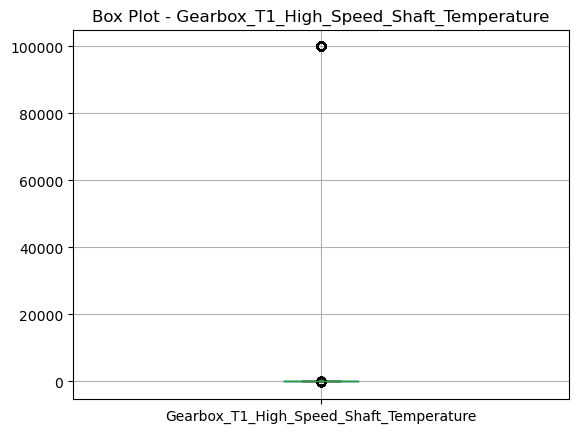

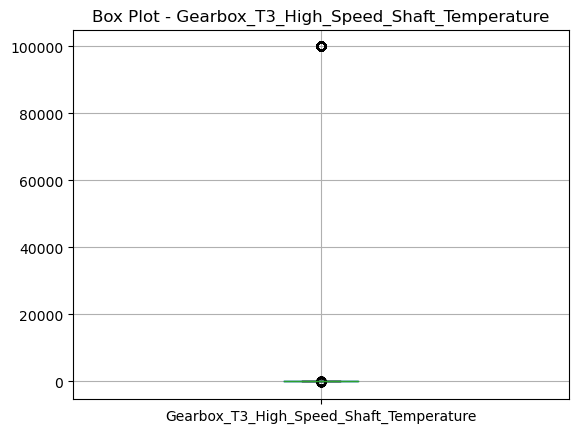

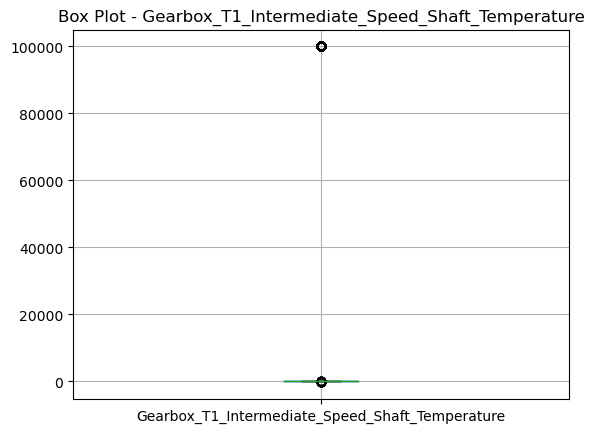

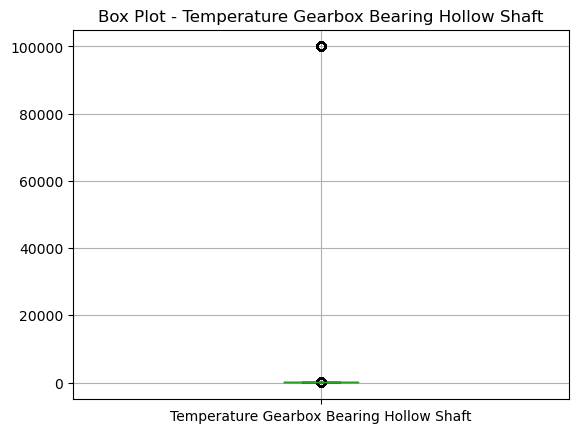

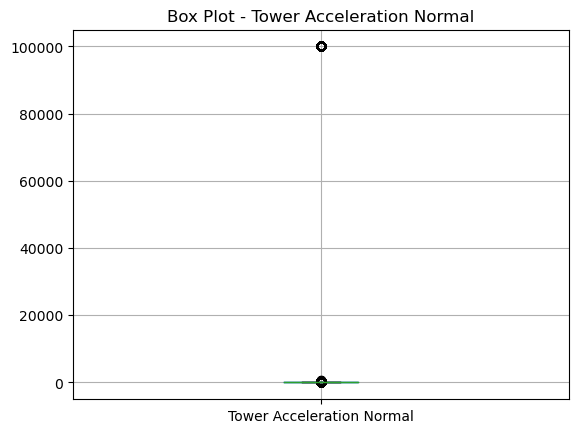

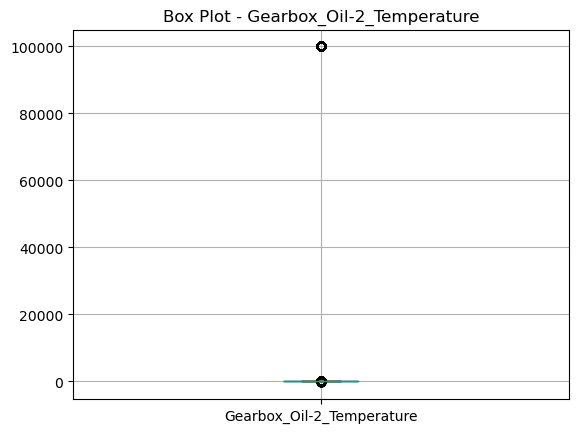

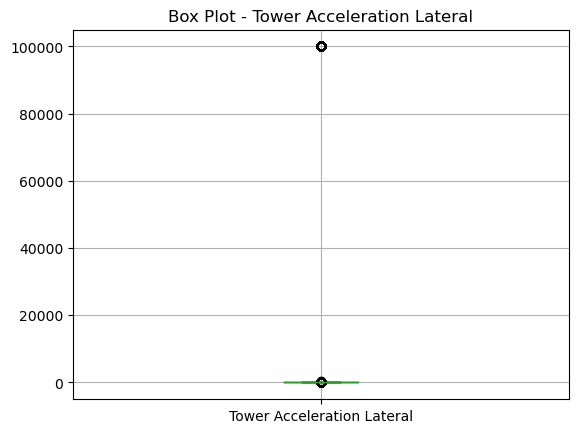

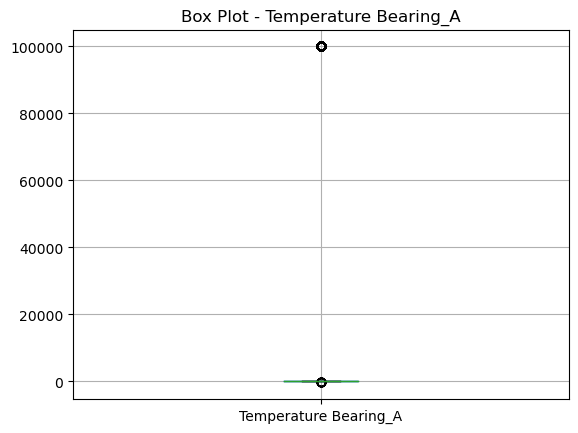

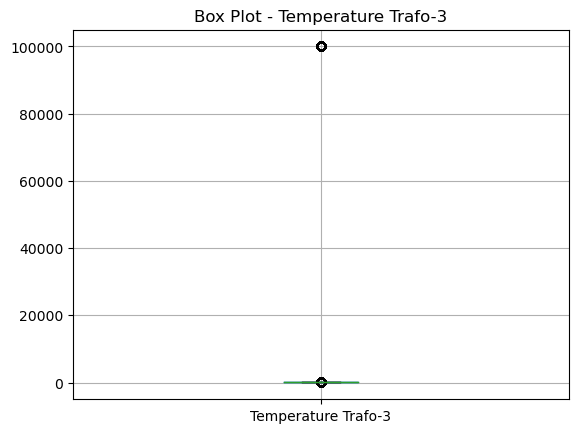

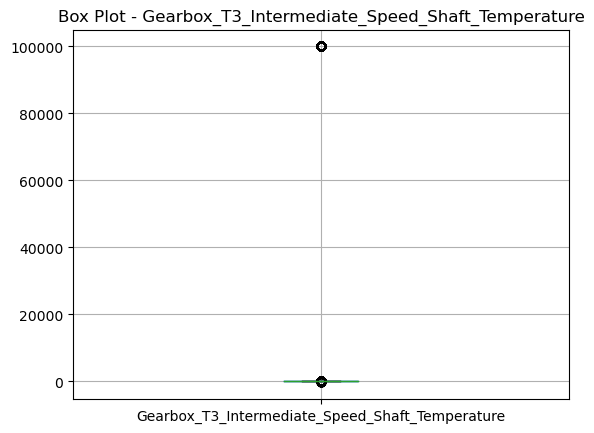

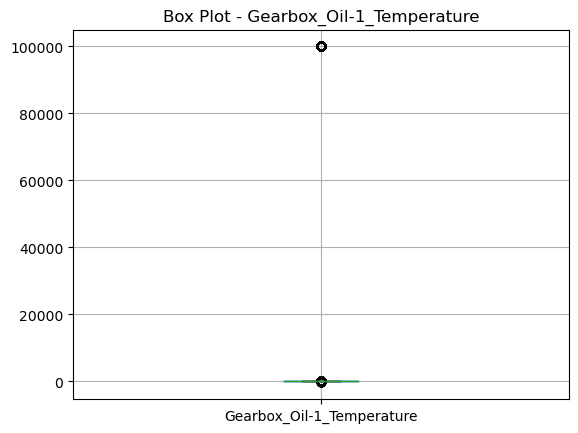

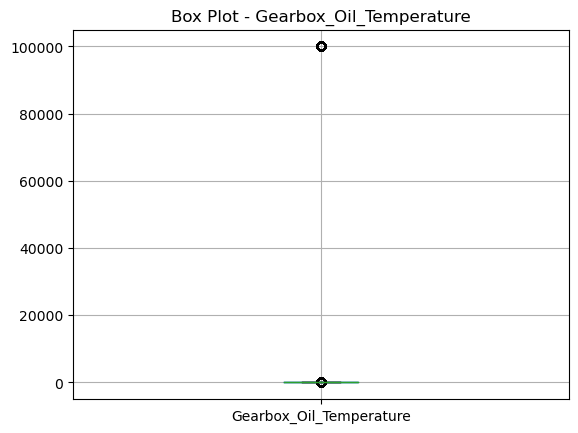

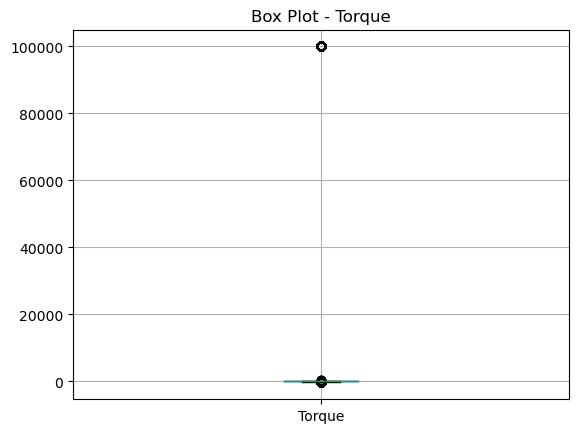

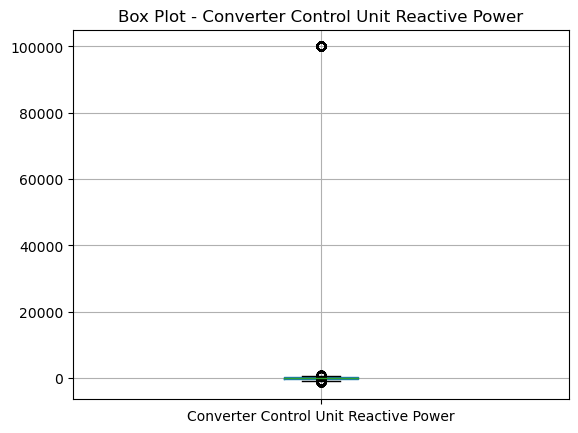

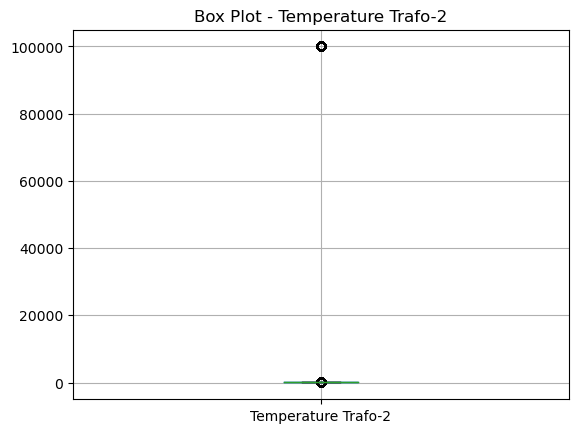

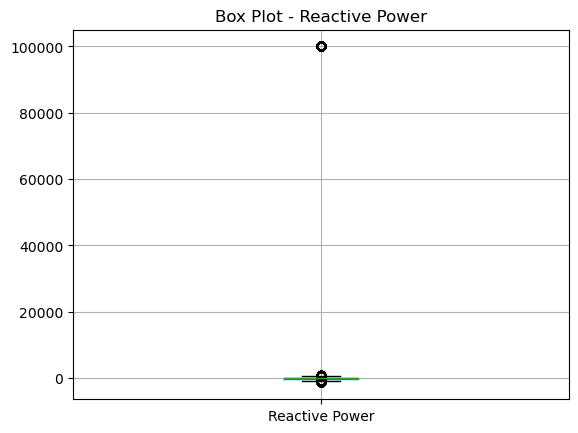

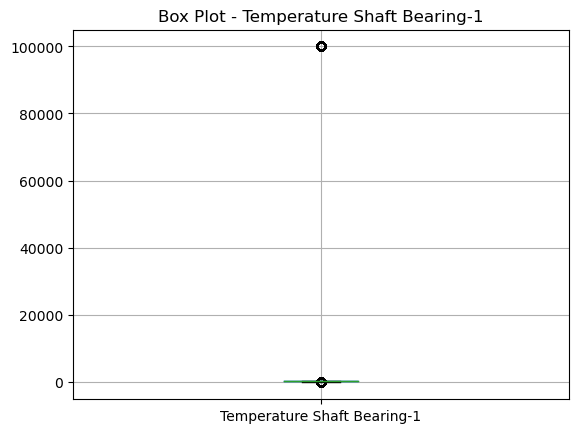

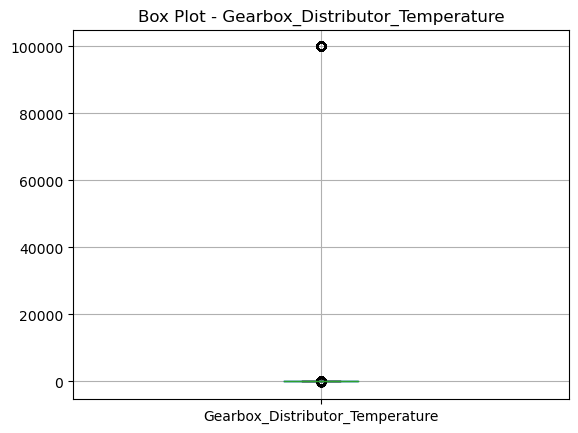

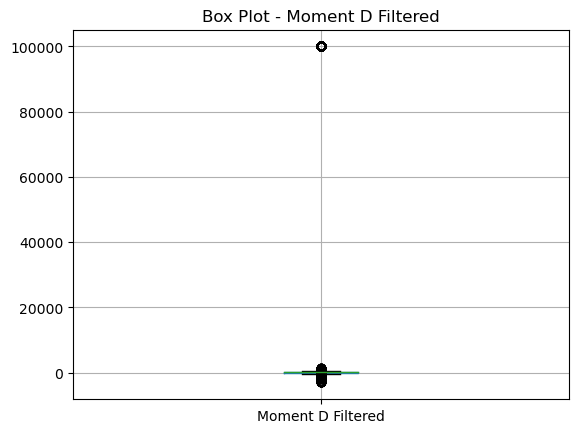

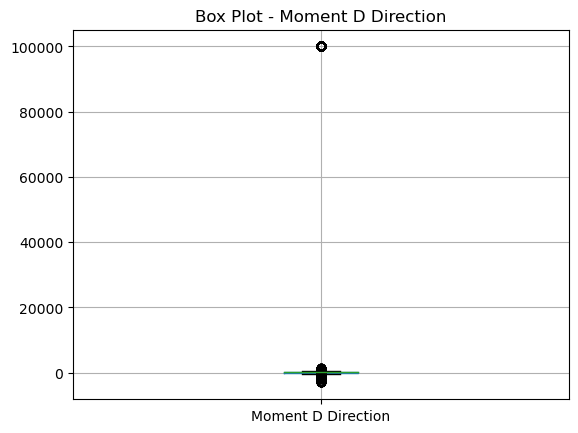

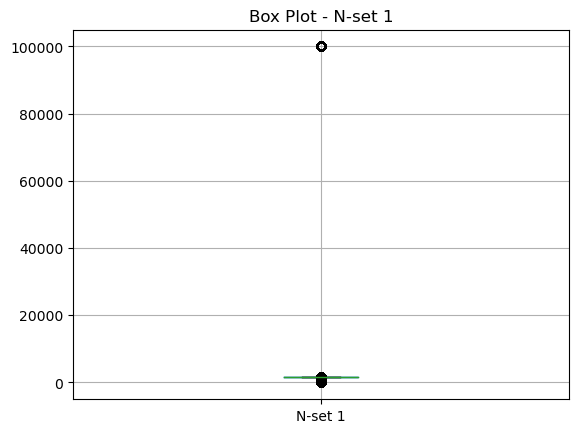

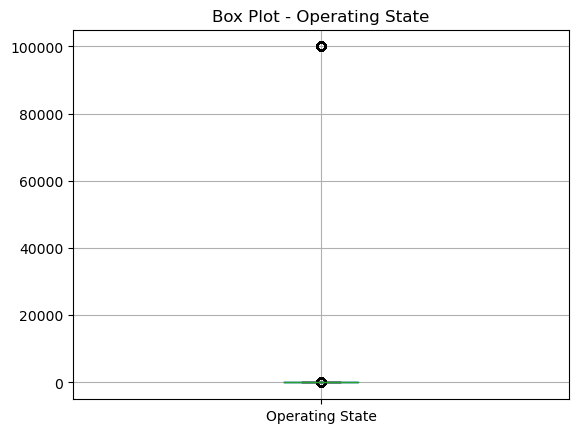

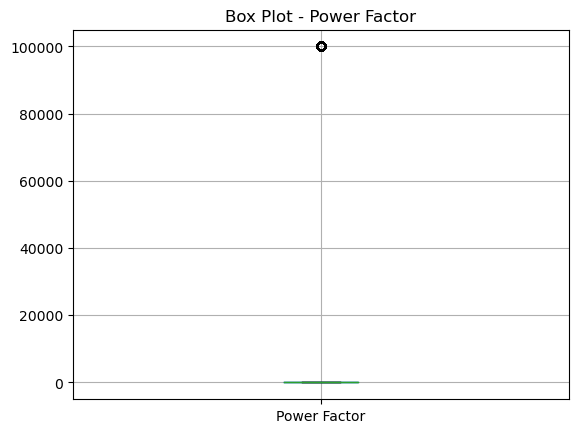

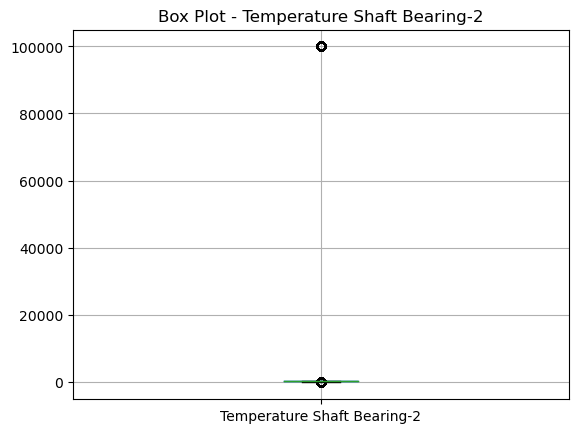

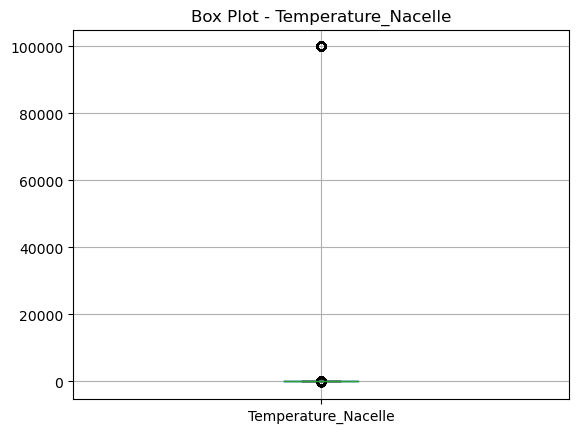

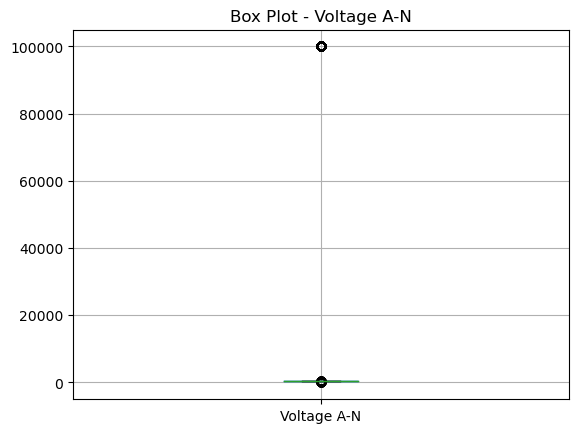

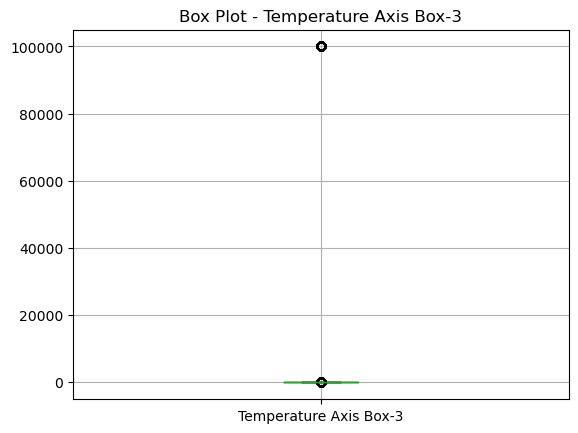

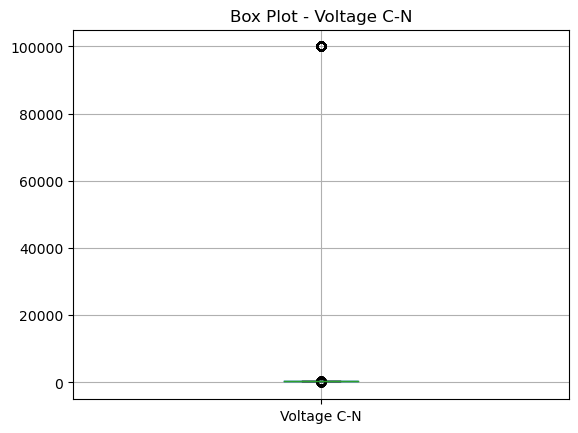

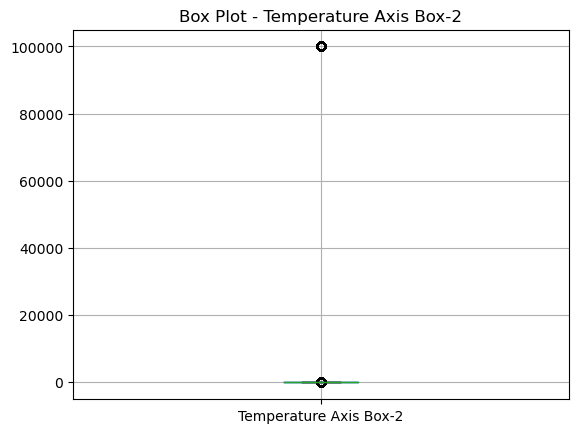

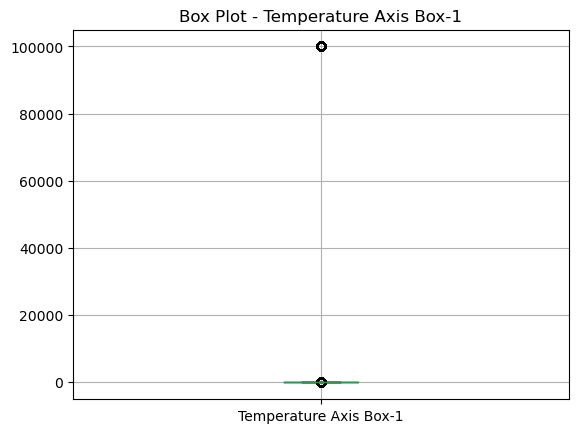

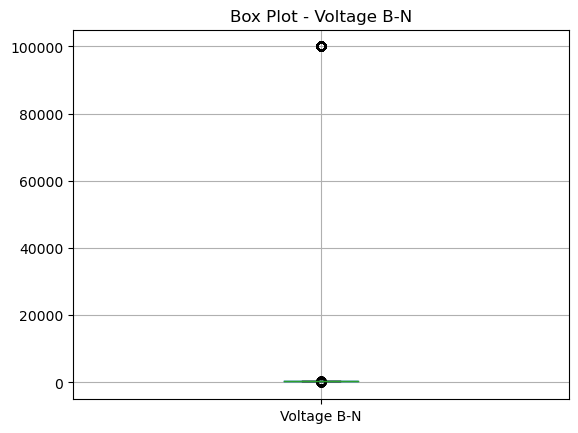

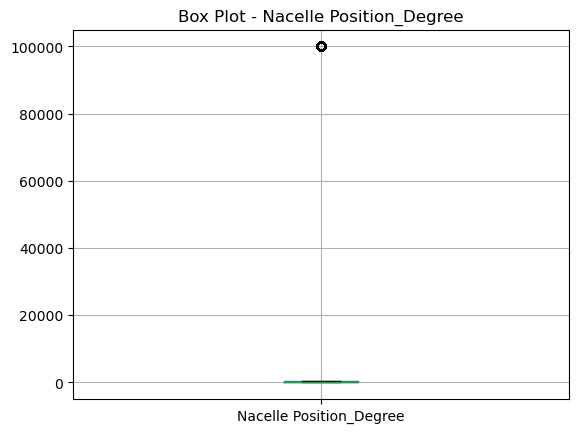

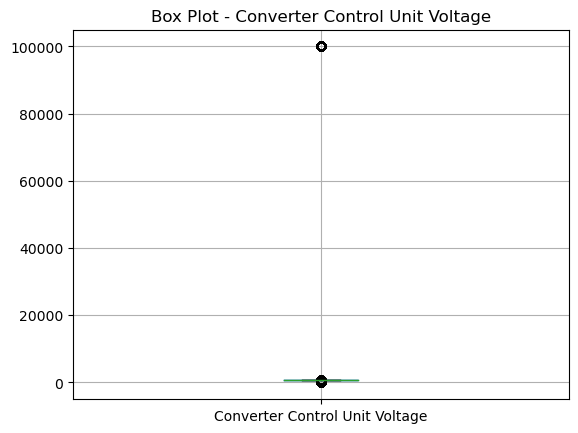

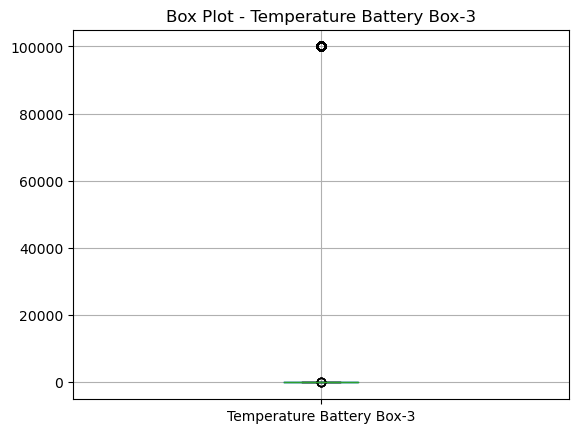

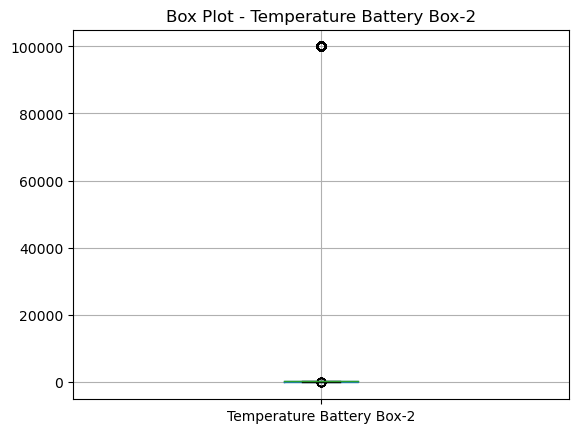

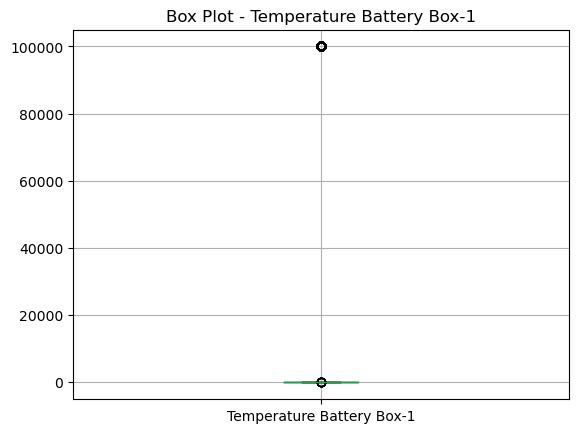

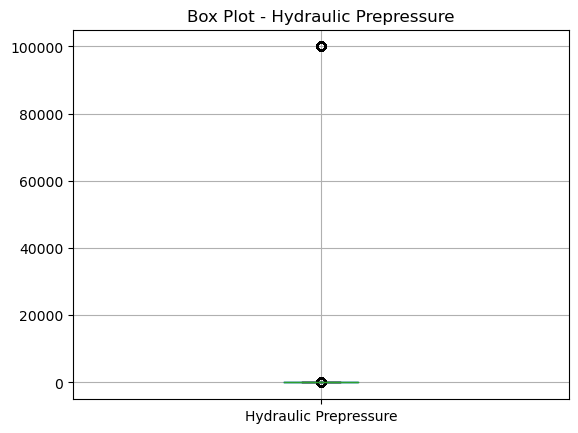

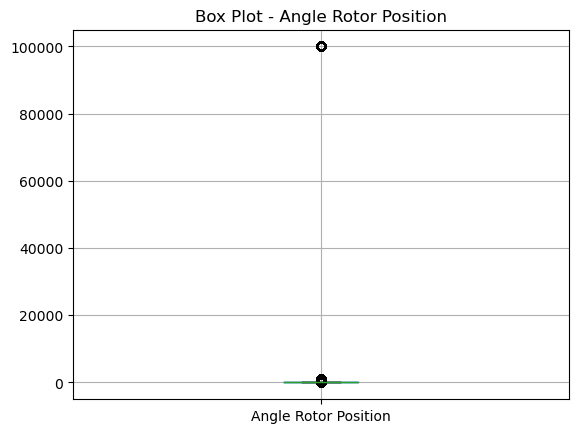

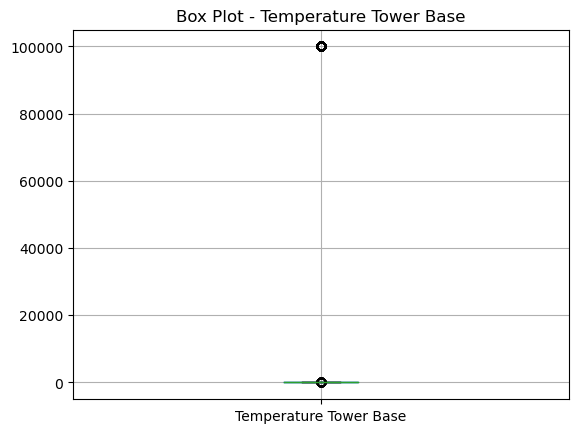

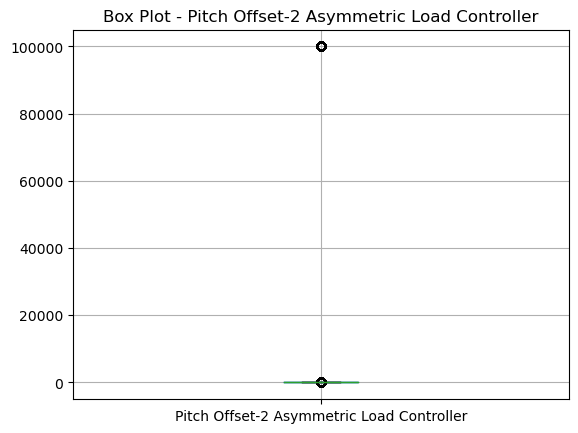

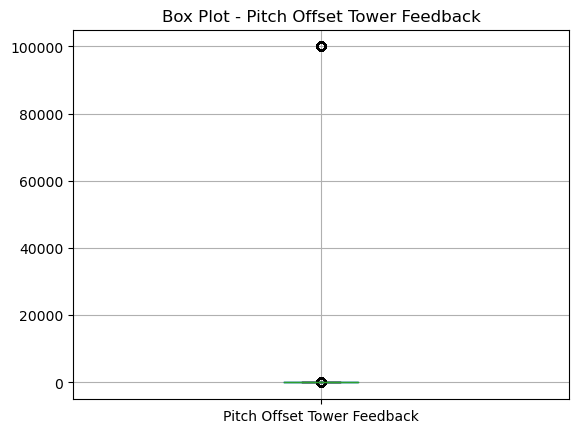

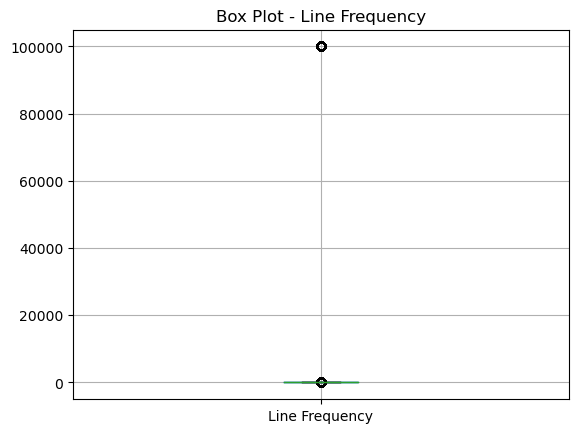

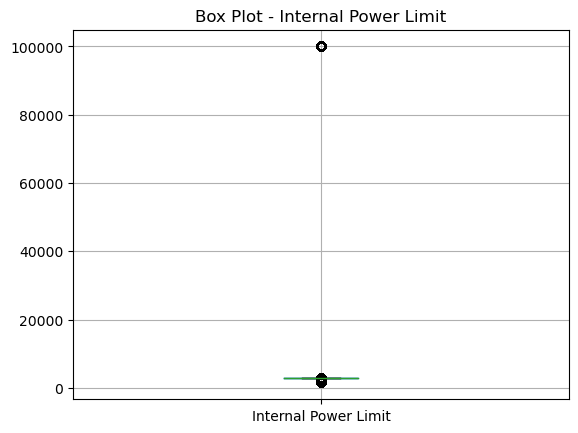

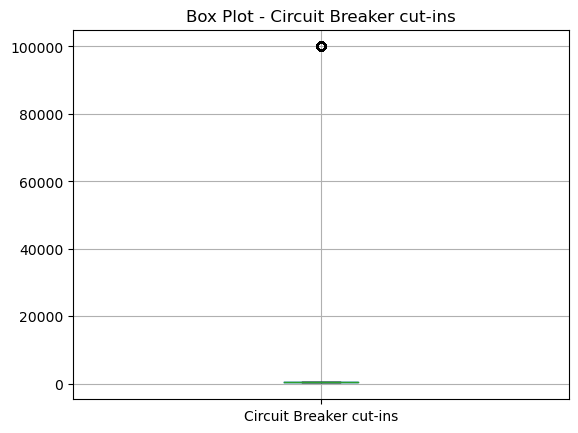

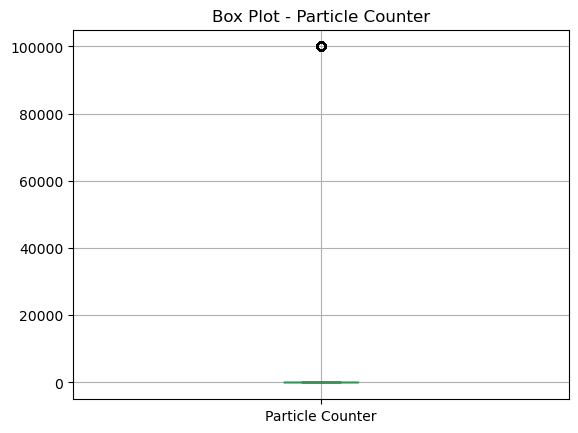

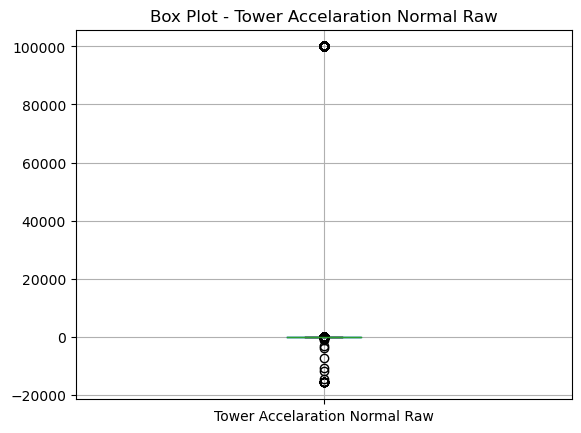

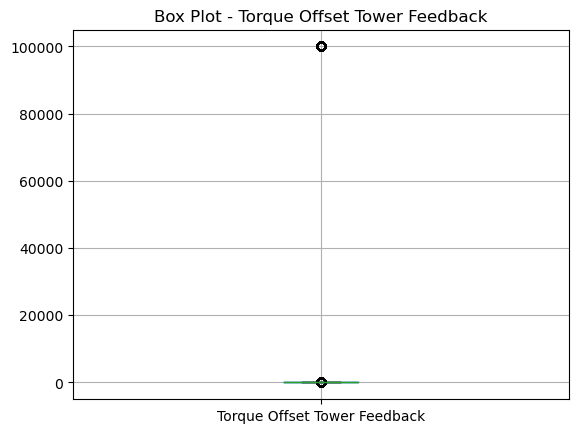

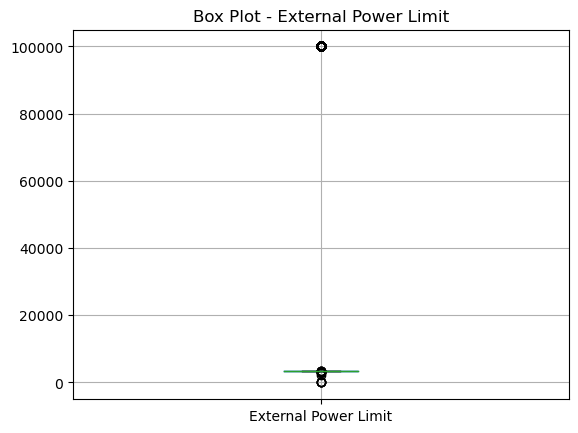

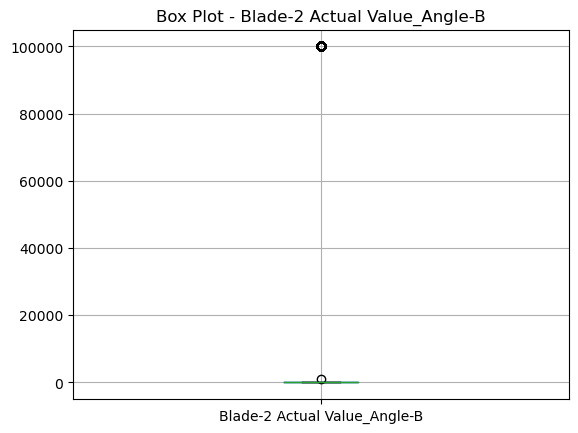

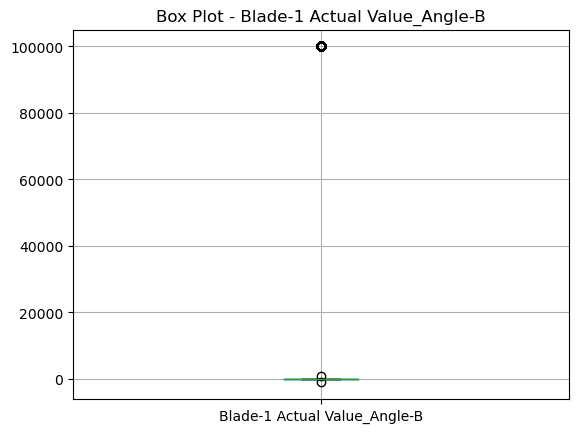

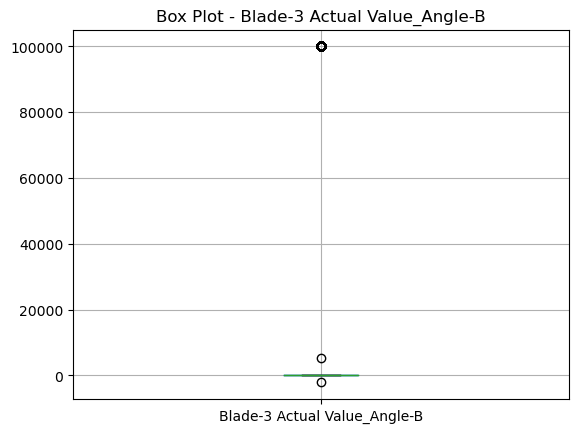

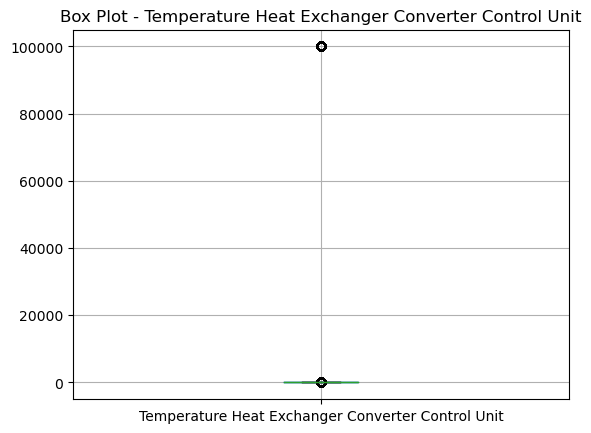

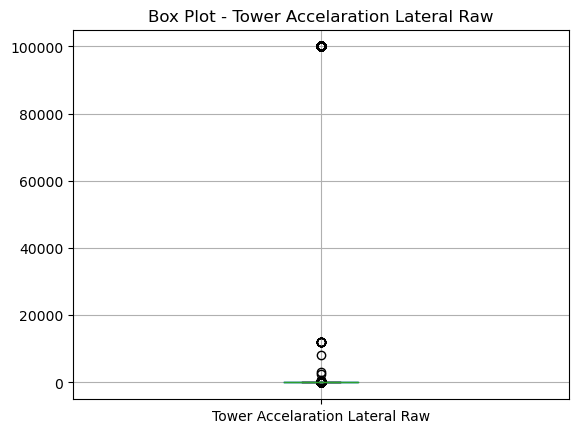

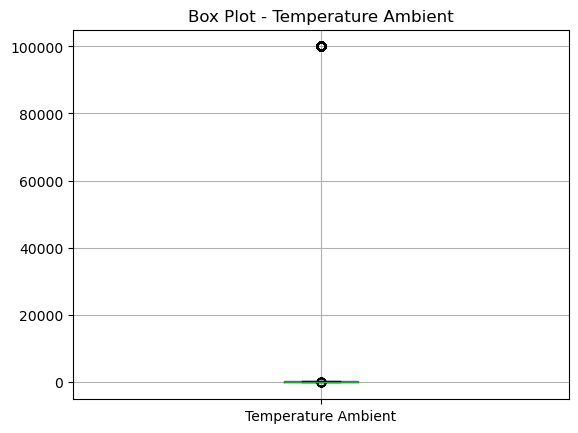

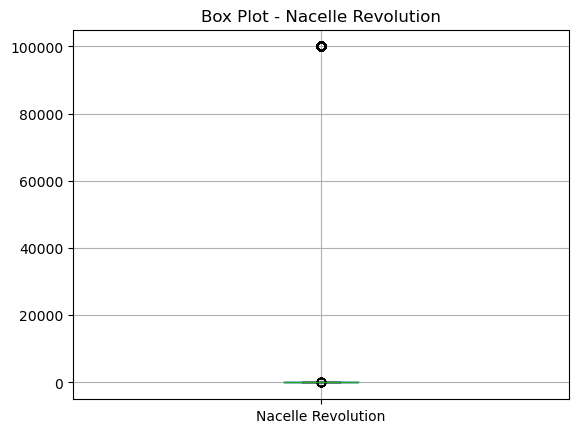

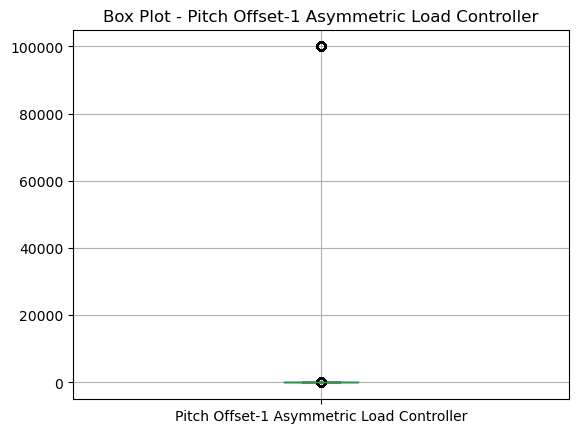

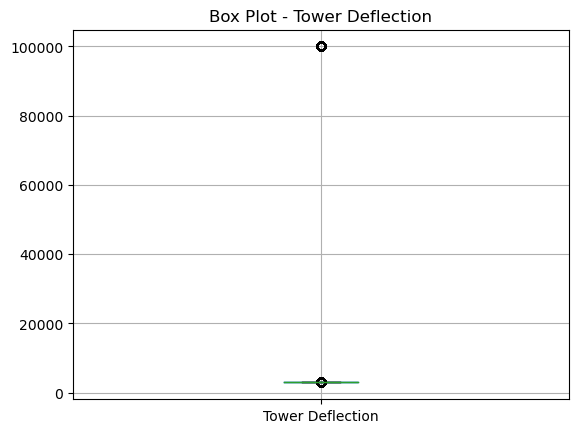

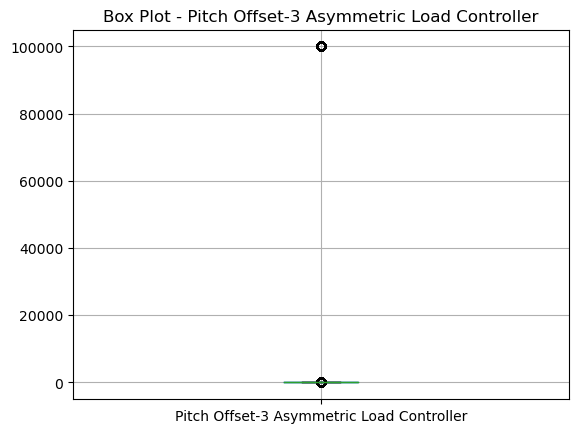

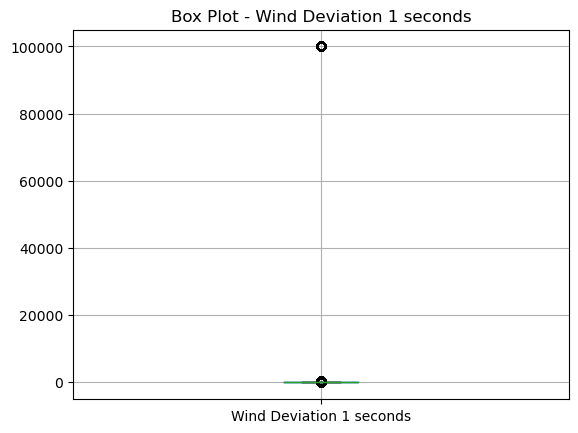

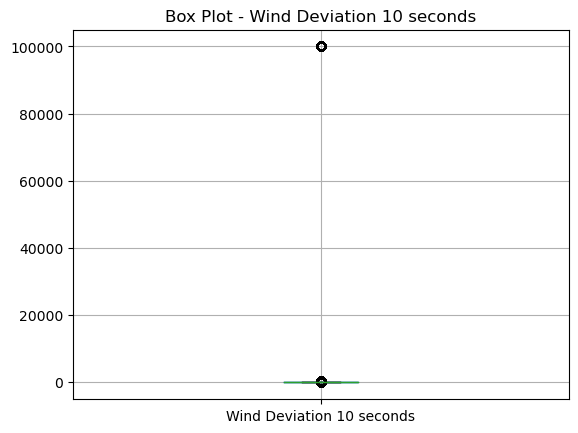

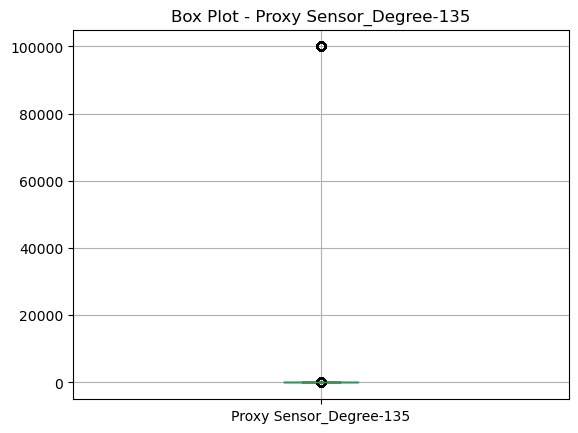

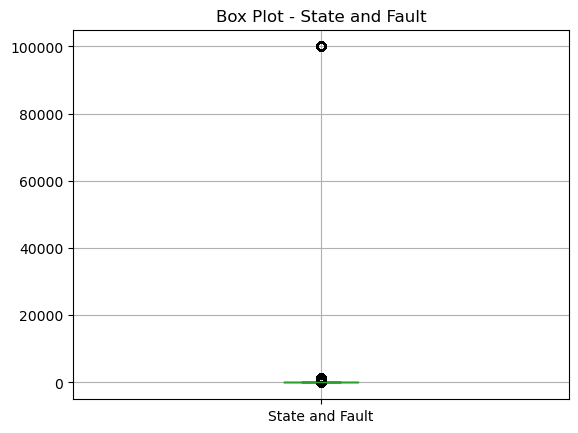

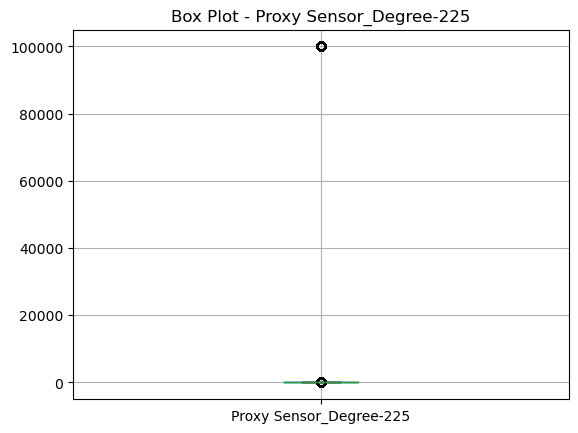

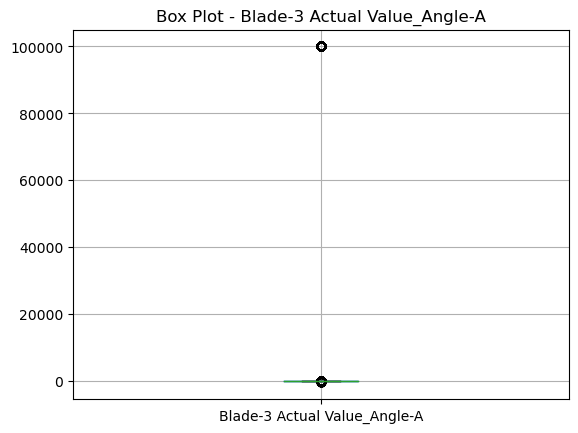

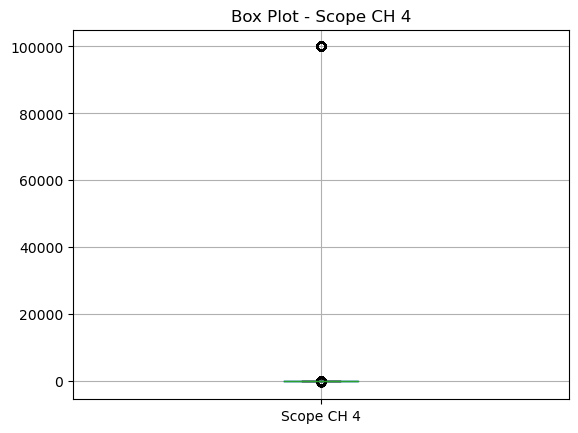

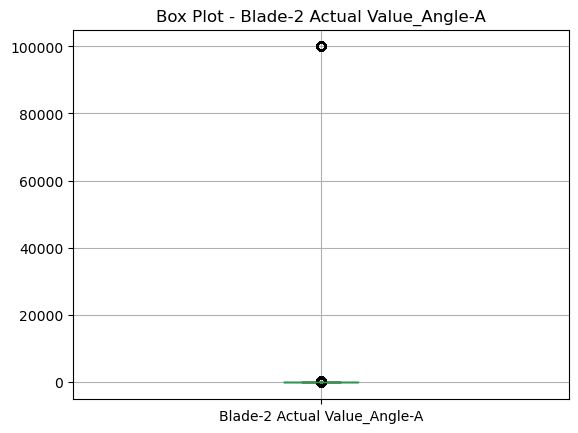

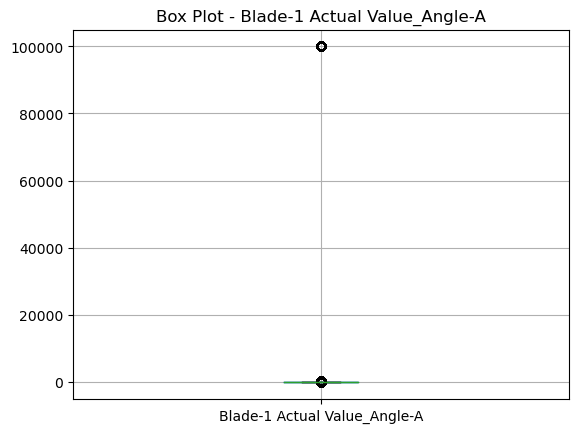

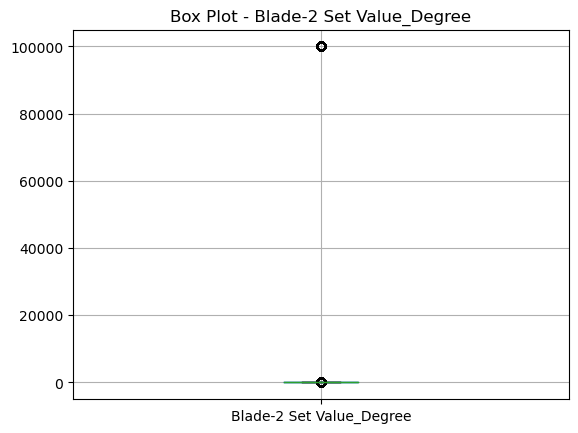

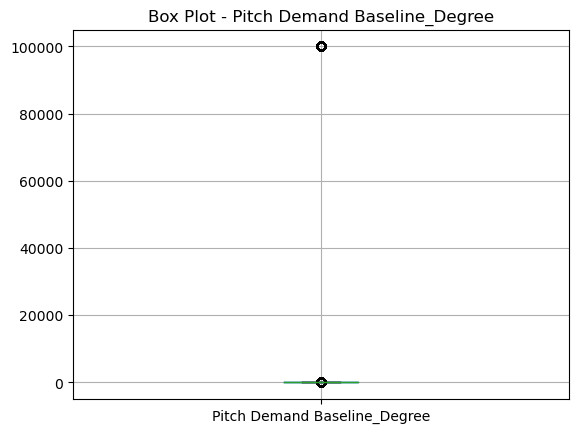

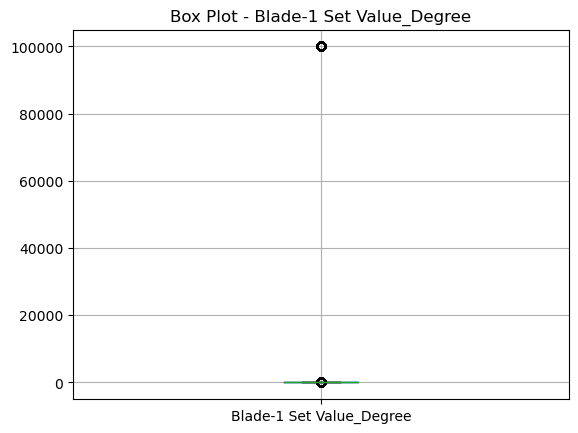

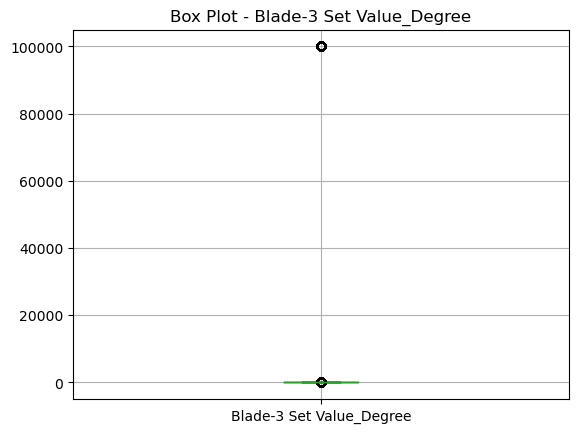

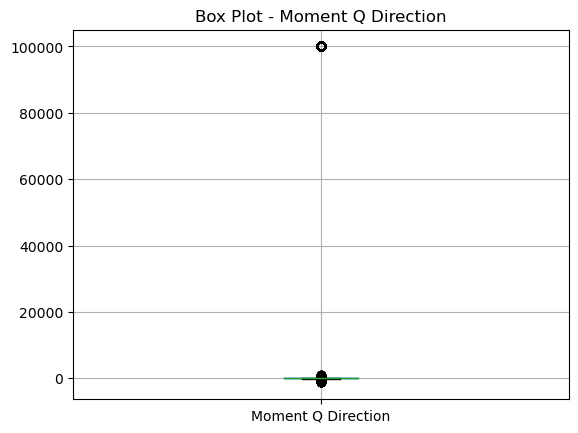

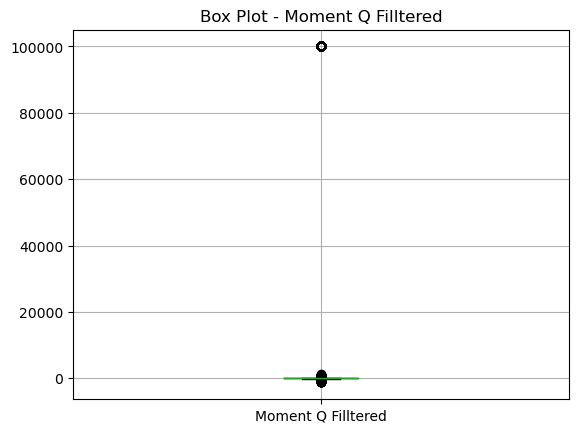

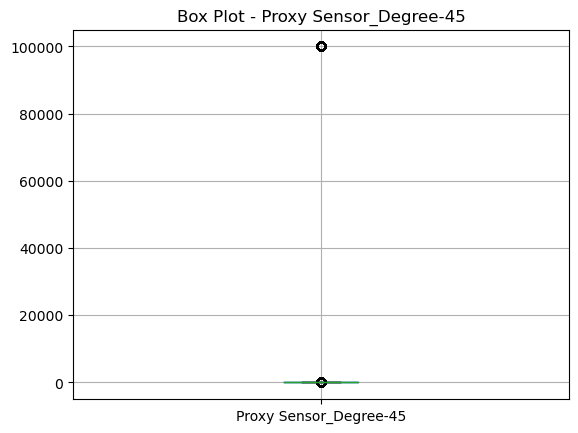

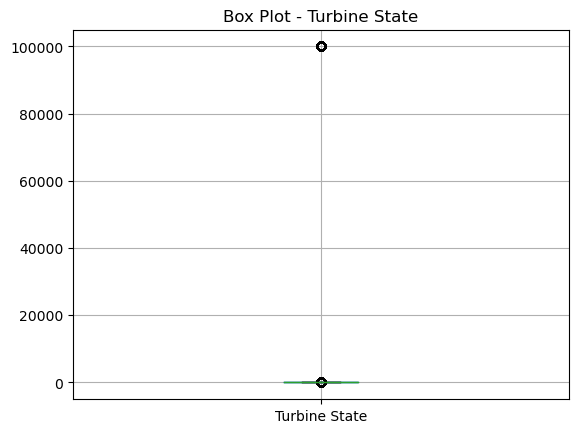

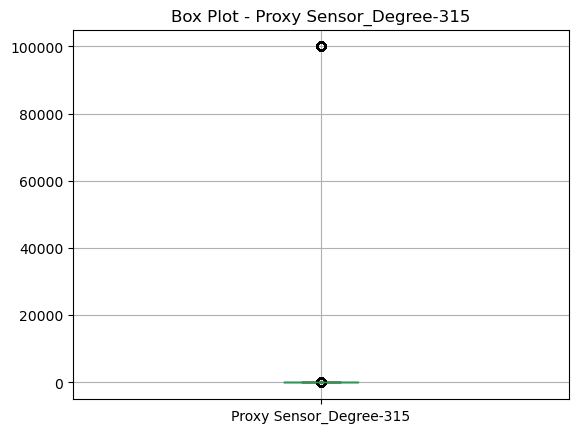

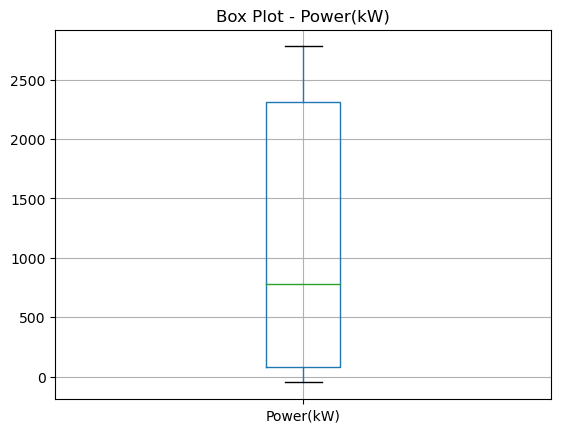

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a box plot for each column in the DataFrame
for column in df_train.columns:
    plt.figure()  # Create a new figure for each box plot
    df.boxplot(column=column)
    plt.title('Box Plot - {}'.format(column))
    plt.show()


The above box plot of each column shows that there are outliers of higher value that is much greater than the mean value of the data points in a column. Therefore to remove outliers we will use the 'describe' function.

In [12]:
#to understand the data and finding outliers i have used the describe function
df_train.describe()

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,Gearbox_Oil-1_Temperature,Gearbox_Oil_Temperature,Torque,Converter Control Unit Reactive Power,Temperature Trafo-2,Reactive Power,Temperature Shaft Bearing-1,Gearbox_Distributor_Temperature,Moment D Filtered,Moment D Direction,N-set 1,Operating State,Power Factor,Temperature Shaft Bearing-2,Temperature_Nacelle,Voltage A-N,Temperature Axis Box-3,Voltage C-N,Temperature Axis Box-2,Temperature Axis Box-1,Voltage B-N,Nacelle Position_Degree,Converter Control Unit Voltage,Temperature Battery Box-3,Temperature Battery Box-2,Temperature Battery Box-1,Hydraulic Prepressure,Angle Rotor Position,Temperature Tower Base,Pitch Offset-2 Asymmetric Load Controller,Pitch Offset Tower Feedback,Line Frequency,Internal Power Limit,Circuit Breaker cut-ins,Particle Counter,Tower Accelaration Normal Raw,Torque Offset Tower Feedback,External Power Limit,Blade-2 Actual Value_Angle-B,Blade-1 Actual Value_Angle-B,Blade-3 Actual Value_Angle-B,Temperature Heat Exchanger Converter Control Unit,Tower Accelaration Lateral Raw,Temperature Ambient,Nacelle Revolution,Pitch Offset-1 Asymmetric Load Controller,Tower Deflection,Pitch Offset-3 Asymmetric Load Controller,Wind Deviation 1 seconds,Wind Deviation 10 seconds,Proxy Sensor_Degree-135,State and Fault,Proxy Sensor_Degree-225,Blade-3 Actual Value_Angle-A,Scope CH 4,Blade-2 Actual Value_Angle-A,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
count,132779.000000,132438.000000,133066.000000,133466.000000,132709.000000,132175.000000,132885.000000,133084.000000,132559.000000,132986.000000,132910.000000,132150.000000,133101.000000,132824.000000,132842.000000,132845.000000,133034.000000,133633.000000,132615.000000,132476.000000,132469.000000,133612.000000,132238.000000,133210.000000,132494.000000,132635.000000,133707.000000,133112.000000,132647.000000,132884.000000,133307.000000,132586.000000,132697.000000,133149.000000,132635.000000,133416.000000,132865.000000,132360.000000,133301.000000,132799.000000,132261.000000,133075.000000,132981.000000,133345.000000,132682.000000,132277.000000,132906.000000,132655.000000,132780.000000,132650.000000,132732.000000,132201.000000,132709.000000,133149.000000,132988.000000,132173.000000,132607.000000,132542.000000,132885.000000,132061.000000,131546.000000,133385.000000,132315.000000,132220.000000,133043.000000,133329.000000,132420.000000,132850.000000,132285.000000,131648.000000,132503.000000,132499.000000,132119.000000,133194.000000,133194.000000,132672.000000,136730.000000
mean,896.733880,887.755432,994.913733,958.506611,919.407899,918.942881,957.228994,878.770355,923.752455,894.884391,935.787892,850.958075,953.577528,853.212949,931.327331,853.111766,863.539909,892.901387,1002.794001,990.123688,2224.239158,842.212730,898.550853,908.943961,862.706638,1279.245737,926.046416,1227.436285,939.776347,951.326172,1273.009982,1107.108802,1538.141244,872.086296,906.561823,924.278394,957.260730,1086.069130,851.910860,863.704397,870.240341,978.291017,3626.520126,1449.733795,908.434882,814.309936,813.346603,4093.690508,858.561025,880.502636,851.355678,846.983618,822.437737,859.043408,770.899145,797.430555,3992.843690,897.819142,891.868205,825.422410,835.197561,917.486168,847.769212,819.482217,820.654699,836.446445,950.372205,859.862774,920.368400,845.100414,845.968466,917.240185,845.177798,822.579510,881.272859,855.210180,1138.556350
std,9144.601402,9087.008729,9676.062237,9469.312862,9226.991795,9262.018137,9557.437100,9119.234038,9252.101024,9133.478519,9359.852917

As we can see from the above table that the max value of each and every column is '99999' which can be termed as outliers. 

Before removing outliers we will check histogram of a column for our convinience

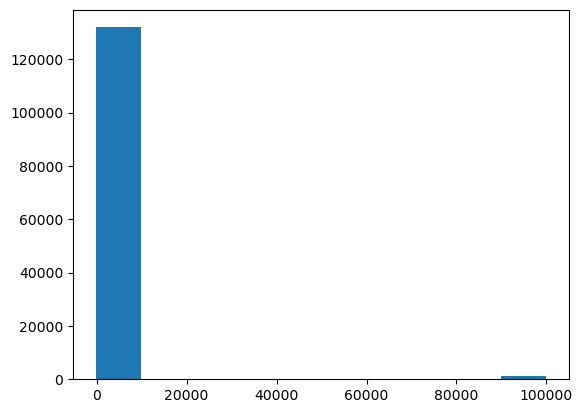

In [13]:
#through the below visualization, it can be seen that the data points are much more between 0 to 20000.
plt.hist(df_train['Temperature Ambient'])
plt.show()

Now we will check the number of data points which contains the value '99999'. Just for example i will take a particular row which is 'Gearbox_T1_High_Speed_Shaft_Temperature'.

In [14]:
# there are total 1121 rows which contains 99999
df_train.query('Gearbox_T1_High_Speed_Shaft_Temperature==99999.0')

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,Gearbox_Oil-1_Temperature,Gearbox_Oil_Temperature,Torque,Converter Control Unit Reactive Power,Temperature Trafo-2,Reactive Power,Temperature Shaft Bearing-1,Gearbox_Distributor_Temperature,Moment D Filtered,Moment D Direction,N-set 1,Operating State,Power Factor,Temperature Shaft Bearing-2,Temperature_Nacelle,Voltage A-N,Temperature Axis Box-3,Voltage C-N,Temperature Axis Box-2,Temperature Axis Box-1,Voltage B-N,Nacelle Position_Degree,Converter Control Unit Voltage,Temperature Battery Box-3,Temperature Battery Box-2,Temperature Battery Box-1,Hydraulic Prepressure,Angle Rotor Position,Temperature Tower Base,Pitch Offset-2 Asymmetric Load Controller,Pitch Offset Tower Feedback,Line Frequency,Internal Power Limit,Circuit Breaker cut-ins,Particle Counter,Tower Accelaration Normal Raw,Torque Offset Tower Feedback,External Power Limit,Blade-2 Actual Value_Angle-B,Blade-1 Actual Value_Angle-B,Blade-3 Actual Value_Angle-B,Temperature Heat Exchanger Converter Control Unit,Tower Accelaration Lateral Raw,Temperature Ambient,Nacelle Revolution,Pitch Offset-1 Asymmetric Load Controller,Tower Deflection,Pitch Offset-3 Asymmetric Load Controller,Wind Deviation 1 seconds,Wind Deviation 10 seconds,Proxy Sensor_Degree-135,State and Fault,Proxy Sensor_Degree-225,Blade-3 Actual Value_Angle-A,Scope CH 4,Blade-2 Actual Value_Angle-A,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
8478,99999.0,63.241665,56.393333,60.666668,35.233547,60.443333,25.712807,39.783333,52.526669,60.665001,58.476665,58.476665,43.047985,-135.535004,61.000000,-147.529999,30.000000,53.058334,-23.994576,-23.532057,1735.0,16.0,-0.984038,26.0,23.139999,401.089996,19.0,398.241669,22.000000,22.0,398.131653,166.244995,692.393311,12.0,13.000000,12.0,74.766281,179.782837,16.059999,0.000000,0.000000,49.988216,2780.0,398.0,0.0,2.566220,0.198967,3300.0,0.0,0.0,0.0,25.000000,-2.549067,6.180,0.670125,0.000000,3138.0,0.000000,-1.945000,-1.831667,5.875585,2.0,5.865512,-0.366048,-0.366048,0.259753,0.105179,0.262752,0.000000,0.094833,-0.357584,-66.384140,-66.195198,5.798763,1.0,5.798645,940.041687
8479,99999.0,62.323334,55.636665,59.884998,47.316895,59.983334,48.373825,37.736668,52.000000,59.884998,57.898335,57.898335,45.570499,-138.273331,61.000000,-151.934998,30.000000,52.630001,-334.295502,-334.708099,1735.0,16.0,-0.985802,26.0,23.136667,401.256653,19.0,398.453339,21.540001,22.0,398.283325,165.111664,692.663330,12.0,12.971666,12.0,74.509598,183.123566,16.611666,0.000000,0.000000,49.993099,2780.0,398.0,0.0,1.781181,0.001520,3300.0,0.0,0.0,0.0,25.000000,-2.165051,6.000,0.666977,0.000000,3138.0,0.000000,0.111667,0.036667,5.844818,2.0,5.805278,-0.366048,-0.366048,0.259753,0.105179,0.262752,0.000000,0.094833,-0.357584,-122.402702,-121.719513,5.886084,1.0,5.859026,1024.613281
8480,99999.0,62.000000,55.000000,59.000000,39.437576,59.000000,32.805084,36.250000,52.000000,59.000000,57.000000,57.000000,47.302299,-151.789993,61.000000,-163.443329,30.000000,52.000000,-321.065979,-321.186218,1735.0,16.0,-0.984165,26.0,23.000000,401.105011,19.0,398.450012,21.000000,22.0,398.274994,166.750000,692.543335,12.0,12.841666,12.0,74.267998,180.799149,16.636667,0.000000,0.000000,49.998100,2780.0,398.0,0.0,2.803711,0.315022,3300.0,0.0,0.0,0.0,25.000000,-2.065737,6.000,0.671528,0.000000,3138.0,0.000000,-1.405000,-1.361667,5.844081,2.0,5.801718,-0.366048,-0.366048,0.259753,0.105179,0.262752,0.000000,0.094833,-0.357584,-130.302368,-130.402664,5.881614,1.0,5.851178,1084.926636
8481,99999.0,62.00

<AxesSubplot:xlabel='Gearbox_T1_High_Speed_Shaft_Temperature', ylabel='Count'>

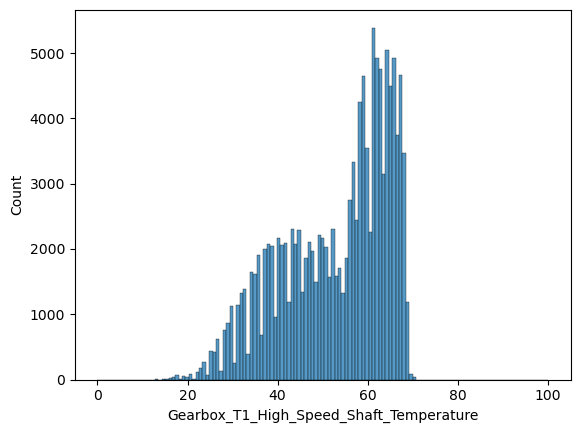

In [15]:
hist_range=(0,100)
sns.histplot(df_train['Gearbox_T1_High_Speed_Shaft_Temperature'], binrange=hist_range)

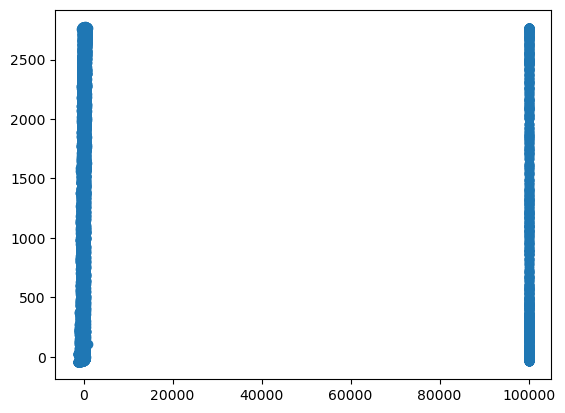

In [16]:
plt.scatter(df_train['Converter Control Unit Reactive Power'],df_train['Power(kW)'])
# plt.xlim([0,])
#the values above 90000 are outliers

In [17]:
#replacing the value '99999' with Nan 
for column in df_train.columns:
    df_train[column] = df_train[column].replace(99999, np.nan)

In [18]:
df_train.describe()

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,Gearbox_Oil-1_Temperature,Gearbox_Oil_Temperature,Torque,Converter Control Unit Reactive Power,Temperature Trafo-2,Reactive Power,Temperature Shaft Bearing-1,Gearbox_Distributor_Temperature,Moment D Filtered,Moment D Direction,N-set 1,Operating State,Power Factor,Temperature Shaft Bearing-2,Temperature_Nacelle,Voltage A-N,Temperature Axis Box-3,Voltage C-N,Temperature Axis Box-2,Temperature Axis Box-1,Voltage B-N,Nacelle Position_Degree,Converter Control Unit Voltage,Temperature Battery Box-3,Temperature Battery Box-2,Temperature Battery Box-1,Hydraulic Prepressure,Angle Rotor Position,Temperature Tower Base,Pitch Offset-2 Asymmetric Load Controller,Pitch Offset Tower Feedback,Line Frequency,Internal Power Limit,Circuit Breaker cut-ins,Particle Counter,Tower Accelaration Normal Raw,Torque Offset Tower Feedback,External Power Limit,Blade-2 Actual Value_Angle-B,Blade-1 Actual Value_Angle-B,Blade-3 Actual Value_Angle-B,Temperature Heat Exchanger Converter Control Unit,Tower Accelaration Lateral Raw,Temperature Ambient,Nacelle Revolution,Pitch Offset-1 Asymmetric Load Controller,Tower Deflection,Pitch Offset-3 Asymmetric Load Controller,Wind Deviation 1 seconds,Wind Deviation 10 seconds,Proxy Sensor_Degree-135,State and Fault,Proxy Sensor_Degree-225,Blade-3 Actual Value_Angle-A,Scope CH 4,Blade-2 Actual Value_Angle-A,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
count,131658.000000,131334.000000,131807.000000,132257.000000,131568.000000,131030.000000,131659.000000,131967.000000,131413.000000,131866.000000,131734.000000,131093.000000,131861.000000,131712.000000,131691.000000,131713.000000,131934.000000,132502.000000,131447.000000,131326.000000,131416.000000,132507.000000,131050.000000,132042.000000,131387.000000,131464.000000,132507.000000,132002.000000,131439.000000,131661.000000,132134.000000,131407.000000,131546.000000,132018.000000,131463.000000,132213.000000,131693.000000,131154.000000,132197.000000,131652.000000,131110.000000,131839.000000,131813.000000,132084.000000,131477.000000,131199.000000,131825.000000,131566.000000,131640.000000,131482.000000,131602.000000,131123.000000,131617.000000,132027.000000,131963.000000,131119.000000,131462.000000,131352.000000,131700.000000,130971.000000,130455.000000,132178.000000,131201.000000,131153.000000,131968.000000,132232.000000,131179.000000,131726.000000,131085.000000,130553.000000,131399.000000,131271.000000,130990.000000,132106.000000,132022.000000,131545.000000,136730.000000
mean,52.929171,54.621484,49.242072,53.148434,60.157819,53.136078,34.958498,39.793213,59.757008,53.146494,51.442640,51.529575,22.170032,16.158503,65.460330,1.007984,36.997804,46.959457,123.142365,123.119380,1440.797087,15.326227,0.181272,32.425993,27.434680,399.911226,28.829331,396.869811,29.365113,31.271600,396.584639,219.838415,676.629313,22.864680,23.147193,22.802064,75.840166,176.535340,23.916379,0.001726,0.000067,49.964828,2772.559921,508.888388,0.259833,-0.643653,-0.002089,3299.861692,0.006631,-0.001196,0.024862,31.826295,-0.410420,16.526110,0.161867,-0.001200,3156.654913,-0.000497,0.129775,0.054966,5.887006,12.710886,5.897038,12.603644,12.756412,13.791405,13.336955,13.922031,13.366395,13.457173,12.895560,-9.639332,-9.426868,5.781291,1.374235,5.804645,1138.556350
std,12.143669,12.766456,10.919301,9.720043,51.098215,12.028860,24.878906,14.115595,12.893236,10.662962,10.351212,9.345329,91.931505,284.545615,11.936281,276.695263,8.225840,9.883965,189.314326,189.591280,638.452179,1.5105

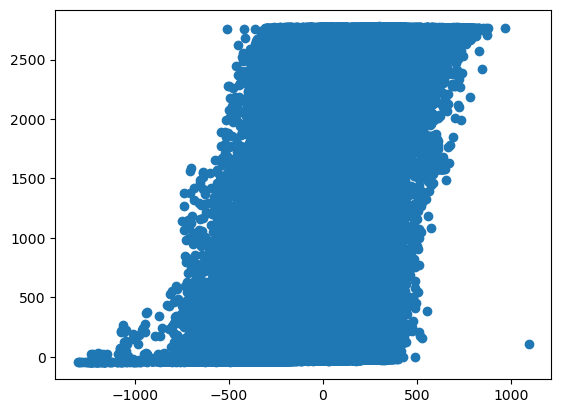

In [19]:
plt.scatter(df_train['Converter Control Unit Reactive Power'],df_train['Power(kW)'])

In [20]:
df_train.isnull().sum().sum()

388922

In [21]:
# Count the number of values greater than the specific value in each column
greater_than_count = (df_train > 800).sum().sum()

# Count the number of values less than the specific value in each column
less_than_count = (df_train < 800).sum().sum()
print(greater_than_count)
print(less_than_count)

574521
9564767


In [22]:
#replacing null values by their mean
for i in df_train.columns:
    df_train[i] = df_train[i].fillna(df_train[i].mean())

In [23]:
df_train.isnull().sum()

Gearbox_T1_High_Speed_Shaft_Temperature            0
Gearbox_T3_High_Speed_Shaft_Temperature            0
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    0
Temperature Gearbox Bearing Hollow Shaft           0
Tower Acceleration Normal                          0
                                                  ..
Moment Q Filltered                                 0
Proxy Sensor_Degree-45                             0
Turbine State                                      0
Proxy Sensor_Degree-315                            0
Power(kW)                                          0
Length: 77, dtype: int64

In [24]:
#for more outlier detection i will use IQR 
import pandas as pd
import numpy as np

lower_bound = 0.25  # Lower bound quartile
upper_bound = 0.75  # Upper bound quartile
threshold = 1.5  # Threshold for outliers

# Function to identify outliers and replace them with NaN
def replace_outliers(column):
    q1 = column.quantile(lower_bound)
    q3 = column.quantile(upper_bound)
    iqr = q3 - q1
    outliers = (column < (q1 - threshold * iqr)) | (column > (q3 + threshold * iqr))
    return column.where(~outliers, other=np.nan)

# Apply the outlier detection function to each column
df_test = df_train.apply(replace_outliers)
#-----------------------------------------------------------------------------------------------
# import random

# # Iterate over each column in the DataFrame
# for column in df_test.columns:
#     # Get the non-null values from the column
#     non_null_values = df_test[column].dropna()
    
#     # Get the count of NaN values in the column
#     null_count = df_test[column].isnull().sum()
    
#     # Generate random values from the non-null values
#     random_values = random.choices(non_null_values, k=null_count)
    
#     # Replace the NaN values with random values in the column
#     df_test[column].fillna(pd.Series(random_values), inplace=True)


Now the values above 800 in some columns would be removeeed as it can be seen as an outlier.
After removing the outliers the data has much Nan values. Therefore we should replace it with the mean values.

Mean/Median/Mode Imputation: Replace the NaN values with the mean, median, or mode of the respective column. This approach works well for numerical data and can be easily implemented using the fillna() method.

Forward or Backward Fill: Propagate the last known value forward or the next known value backward to fill the NaN values. This method is useful for time series or sequential data where the order of values is important. You can use the fillna() method with the method parameter set to "ffill" (forward fill) or "bfill" (backward fill).

Interpolation: Estimate the missing values based on the existing values using interpolation techniques such as linear interpolation, polynomial interpolation, or spline interpolation. The interpolate() method in pandas provides options for different interpolation methods.

In [25]:
import pandas as pd

# Perform interpolation to fill NaN values
df_interpolated = df_test.interpolate()

# Display the DataFrame with interpolated values
df_interpolated

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,Gearbox_Oil-1_Temperature,Gearbox_Oil_Temperature,Torque,Converter Control Unit Reactive Power,Temperature Trafo-2,Reactive Power,Temperature Shaft Bearing-1,Gearbox_Distributor_Temperature,Moment D Filtered,Moment D Direction,N-set 1,Operating State,Power Factor,Temperature Shaft Bearing-2,Temperature_Nacelle,Voltage A-N,Temperature Axis Box-3,Voltage C-N,Temperature Axis Box-2,Temperature Axis Box-1,Voltage B-N,Nacelle Position_Degree,Converter Control Unit Voltage,Temperature Battery Box-3,Temperature Battery Box-2,Temperature Battery Box-1,Hydraulic Prepressure,Angle Rotor Position,Temperature Tower Base,Pitch Offset-2 Asymmetric Load Controller,Pitch Offset Tower Feedback,Line Frequency,Internal Power Limit,Circuit Breaker cut-ins,Particle Counter,Tower Accelaration Normal Raw,Torque Offset Tower Feedback,External Power Limit,Blade-2 Actual Value_Angle-B,Blade-1 Actual Value_Angle-B,Blade-3 Actual Value_Angle-B,Temperature Heat Exchanger Converter Control Unit,Tower Accelaration Lateral Raw,Temperature Ambient,Nacelle Revolution,Pitch Offset-1 Asymmetric Load Controller,Tower Deflection,Pitch Offset-3 Asymmetric Load Controller,Wind Deviation 1 seconds,Wind Deviation 10 seconds,Proxy Sensor_Degree-135,State and Fault,Proxy Sensor_Degree-225,Blade-3 Actual Value_Angle-A,Scope CH 4,Blade-2 Actual Value_Angle-A,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
0,57.000000,59.000000,52.000000,56.158333,47.053776,57.000000,18.890772,35.000000,48.576668,56.158333,55.000000,55.000000,35.873798,-205.350006,57.00000,-212.126663,28.000000,52.618332,264.949768,265.629913,1735.0,16.0,-0.953030,25.0,20.110001,395.029999,17.715000,392.086670,20.000000,20.000000,392.413330,10.773334,682.044983,11.0,12.0,11.0,72.210175,181.896973,15.140000,0.000000,0.000000,50.018833,2780.0,395.0,0.000000,-0.072567,0.076724,3300.0,0.0,0.0,0.0,24.000000,-1.582408,3.976667,-0.761741,0.0,3138.000000,0.000000,-2.923333,-3.011667,5.909392,2.0,5.957316,-0.318974,-0.318974,0.272715,0.055473,0.267122,0.000000,0.058617,-0.325738,37.867054,39.281124,5.732657,1.0,5.779913,705.876648
1,57.693333,59.485001,52.450001,57.000000,64.969742,57.413334,28.560265,35.233334,48.000000,57.000000,55.174999,55.174999,41.370548,-176.223328,57.00000,-183.403336,28.000000,53.060001,3.340425,3.055089,1735.0,16.0,-0.971856,25.0,20.424999,396.133331,17.459999,392.931671,20.000000,20.000000,393.040009,4.976666,683.515015,11.0,12.0,11.0,72.220482,178.224670,14.948334,0.000000,0.000000,50.006634,2780.0,395.0,0.000000,2.632190,0.323242,3300.0,0.0,0.0,0.0,24.000000,-2.231261,4.000000,-0.777843,0.0,3138.000000,0.000000,-3.033333,-2.975000,5.892997,2.0,5.868237,-0.318974,-0.318974,0.272715,0.055473,0.267122,0.000000,0.058617,-0.325738,-90.169106,-89.018669,5.813177,1.0,5.796757,884.711670
2,59.000000,60.756668,53.536667,57.775002,51.149670,58.728333,34.228813,36.000000,48.053333,57.775002,56.000000,56.000000,44.466202,-105.058334,57.00000,-112.143333,28.763334,54.000000,75.649010,75.435135,1735.0,16.0,-0.988937,25.0,21.000000,397.138336,18.000000,394.028320,20.000000,20.000000,393.941681,0.636667,685.244995,11.0,12.0,11.0,72.364883,184.183014,14.171667,0.000000,0.000000,49.989101,2780.0,395.0,0.000000,2.117626,-0.032209,3300.0,0.0,0.0,0.0,24.000000,-2.469615,4.000000,-0.789898,0.0,3138.000000,0.000000,1.053333,1.028333,5.898009,2.0,5.874691,-0.318974,-0.318974,0.272715,0.055473,0.267122,0.000000,0.058617,-0.325738,-88.556343,-88.422020,5.786413,1.0,5.772958,982.875000
3,5

In [26]:
df_interpolated.isnull().sum()

Gearbox_T1_High_Speed_Shaft_Temperature            0
Gearbox_T3_High_Speed_Shaft_Temperature            0
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    0
Temperature Gearbox Bearing Hollow Shaft           0
Tower Acceleration Normal                          0
                                                  ..
Moment Q Filltered                                 0
Proxy Sensor_Degree-45                             0
Turbine State                                      0
Proxy Sensor_Degree-315                            0
Power(kW)                                          0
Length: 77, dtype: int64

In [27]:
df_interpolated.isnull().sum().sum()

0

In [28]:
df_test=df_interpolated

In [29]:
#finding correlation between the features
corr=df_test.corr()

In [30]:
a=corr.iloc[76,:]

In [31]:
a

Gearbox_T1_High_Speed_Shaft_Temperature            0.817208
Gearbox_T3_High_Speed_Shaft_Temperature            0.804375
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    0.819705
Temperature Gearbox Bearing Hollow Shaft           0.763030
Tower Acceleration Normal                          0.781769
                                                     ...   
Moment Q Filltered                                -0.526897
Proxy Sensor_Degree-45                            -0.645307
Turbine State                                           NaN
Proxy Sensor_Degree-315                           -0.725481
Power(kW)                                          1.000000
Name: Power(kW), Length: 77, dtype: float64

In [32]:
#finding top 20 features
#having less features gets us a good accuracy
#by performing replacement of outliers
a.nlargest(21)

Power(kW)                                          1.000000
Torque                                             0.884463
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    0.819705
Gearbox_T1_High_Speed_Shaft_Temperature            0.817208
Gearbox_T3_High_Speed_Shaft_Temperature            0.804375
Tower Acceleration Lateral                         0.798638
Gearbox_Oil-2_Temperature                          0.790738
Tower Acceleration Normal                          0.781769
Temperature Gearbox Bearing Hollow Shaft           0.763030
Gearbox_T3_Intermediate_Speed_Shaft_Temperature    0.760959
Temperature Trafo-3                                0.758906
Gearbox_Oil-1_Temperature                          0.755274
Gearbox_Oil_Temperature                            0.752977
Temperature Bearing_A                              0.750273
Voltage A-N                                        0.739614
Temperature Trafo-2                                0.704002
Voltage C-N                             

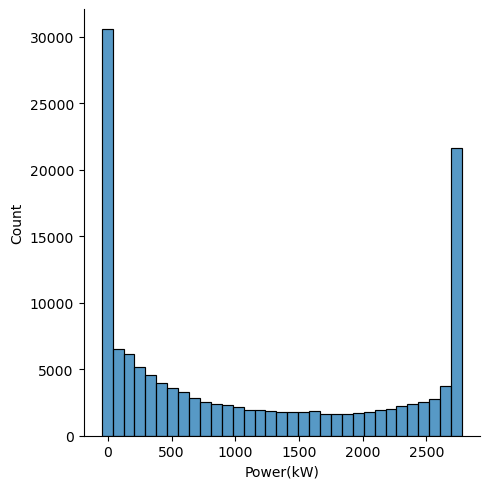

In [33]:
#to know the distribution of power
sns.displot(x=df_test[r'Power(kW)'])

In [34]:
# performed lasso regression

In [35]:
#selecting most important features in the dataset
columns_to_select = ['Torque', 'Gearbox_T1_Intermediate_Speed_Shaft_Temperature', 'Gearbox_T1_High_Speed_Shaft_Temperature','Gearbox_T3_High_Speed_Shaft_Temperature','Gearbox_Oil-2_Temperature','Tower Acceleration Lateral','Temperature Gearbox Bearing Hollow Shaft','Gearbox_T3_Intermediate_Speed_Shaft_Temperature','Gearbox_Oil-1_Temperature','Gearbox_Oil_Temperature','Gearbox_Oil_Temperature','Temperature Bearing_A','Temperature Trafo-3','Voltage A-N','Tower Acceleration Normal','Temperature Trafo-2','Voltage C-N','Converter Control Unit Reactive Power','Reactive Power','Converter Control Unit Voltage','Power(kW)']

In [36]:
#cloning the df_test
df_test1=df_test[columns_to_select]

In [37]:
X = df_test1.drop('Power(kW)', axis=1)
y = df_test1['Power(kW)']

In [38]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Create a Lasso regression model
lasso = Lasso(alpha=0.6)  # You can adjust the alpha value as needed

In [41]:
# Fitting the Lasso model to the training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.6)

In [42]:
# Making predictions on the testing data
y_pred = lasso.predict(X_test)

In [43]:
# Evaluate accuracy of the model using R-squared score
accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Accuracy (R-squared score):", accuracy)
print(mse)
print(mae)


Accuracy (R-squared score): 0.8913097294399004
127053.07286400373
286.04674987412085


In [44]:
#gradient boosting regressor

In [45]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the dataset
X = df_test1.drop('Power(kW)', axis=1)
y = df_test1['Power(kW)']

# Perform PCA on the data
n_components = 10  # Specify the desired number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train a Gradient Boosting Regressor model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Accuracy (R-squared score):", accuracy)
print(mse)
print(mae)

Accuracy (R-squared score): 0.9642082780975989
41838.595371601805
133.47942134973593


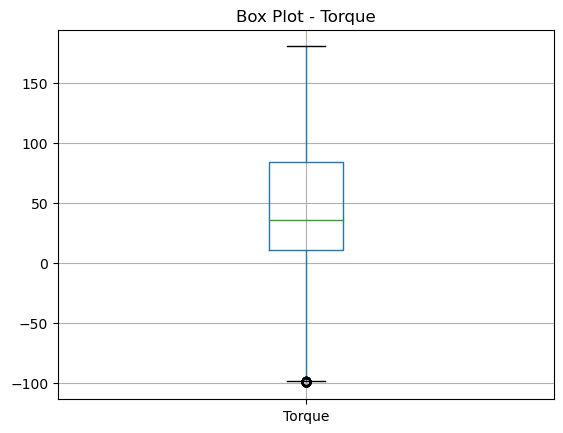

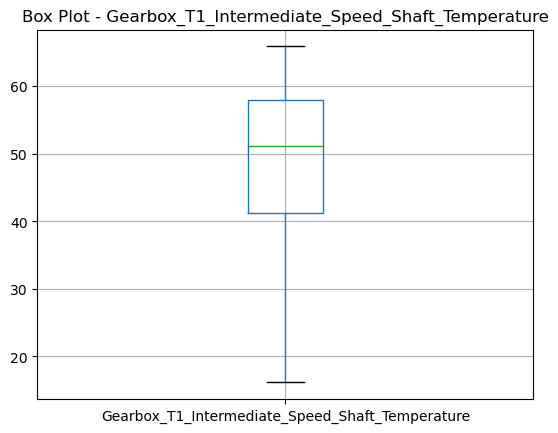

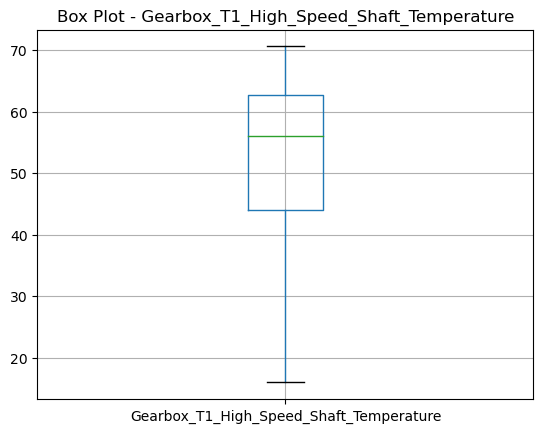

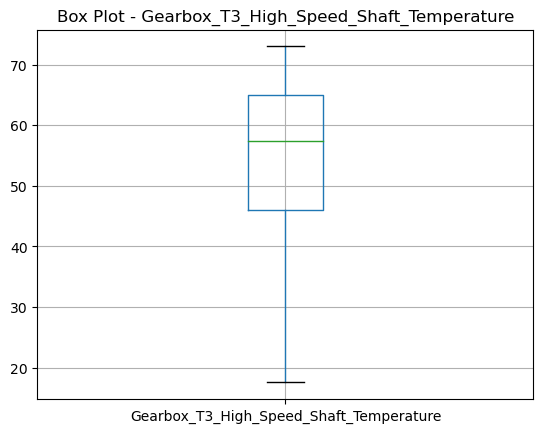

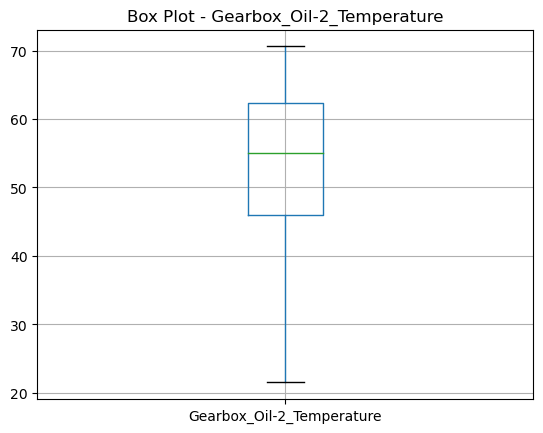

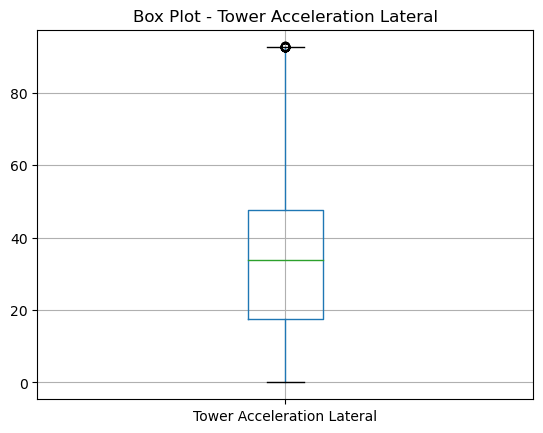

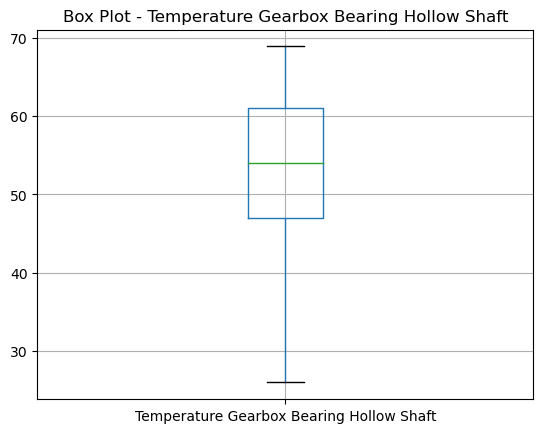

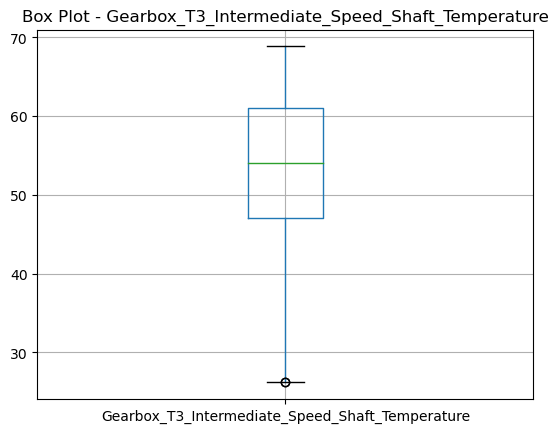

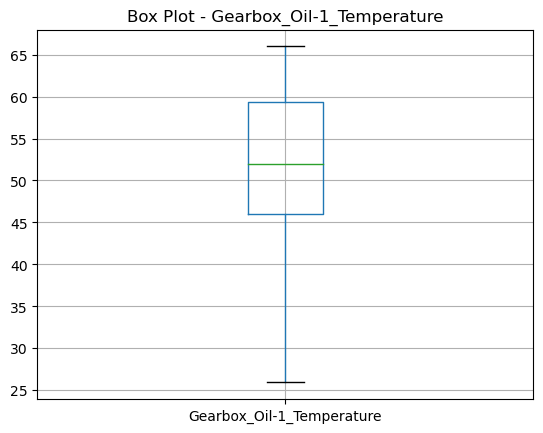

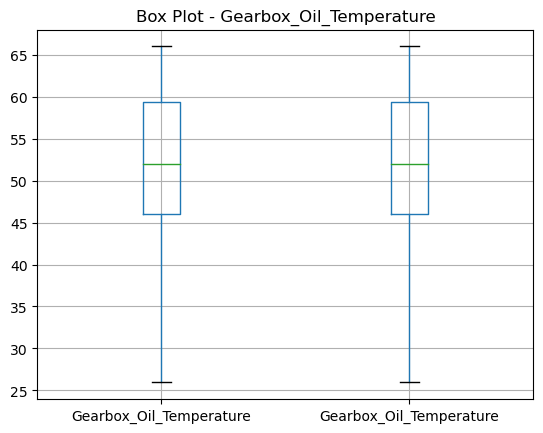

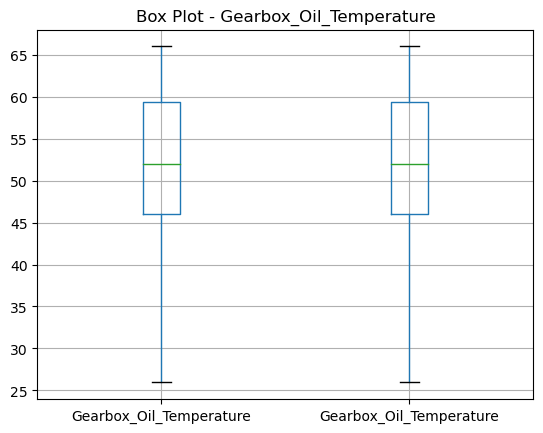

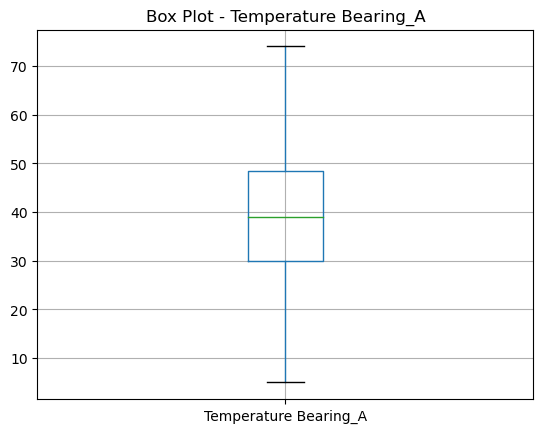

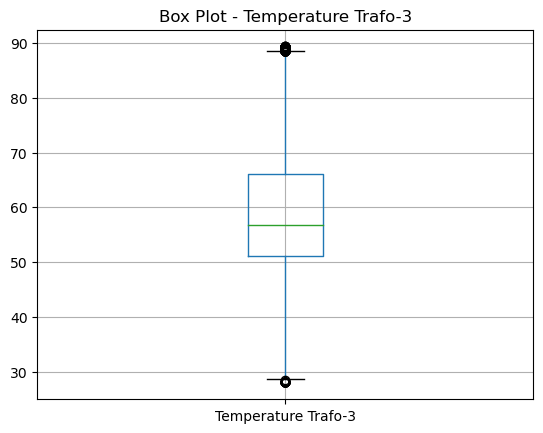

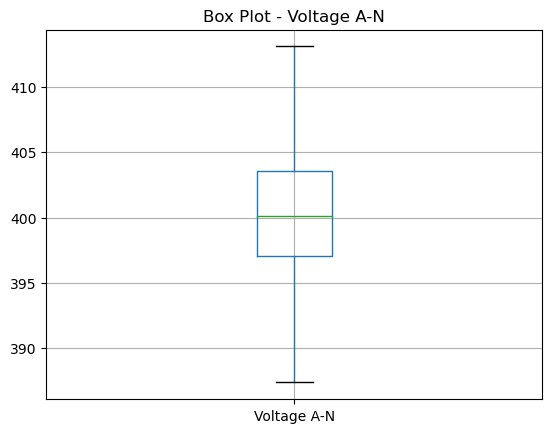

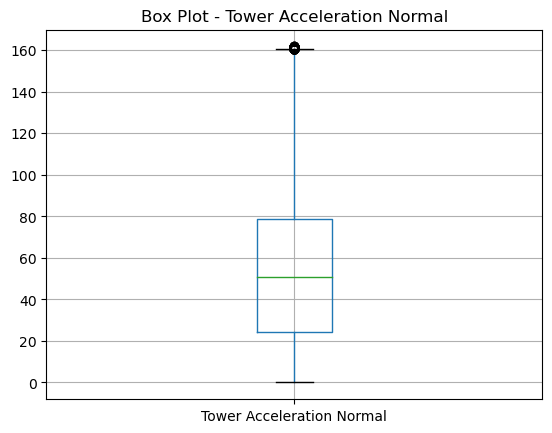

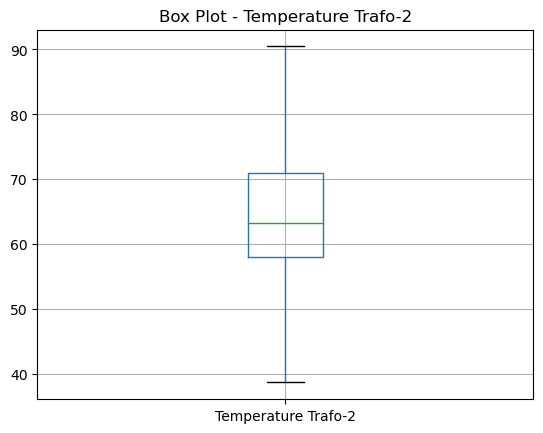

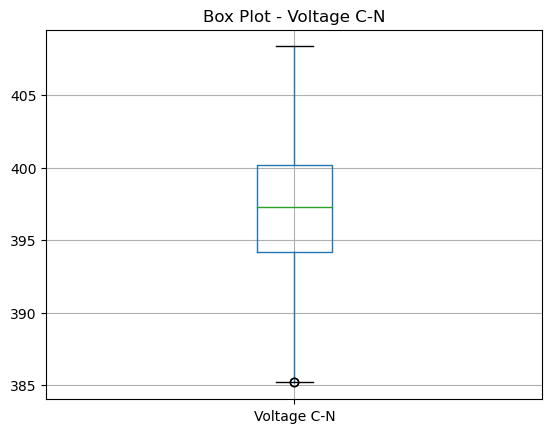

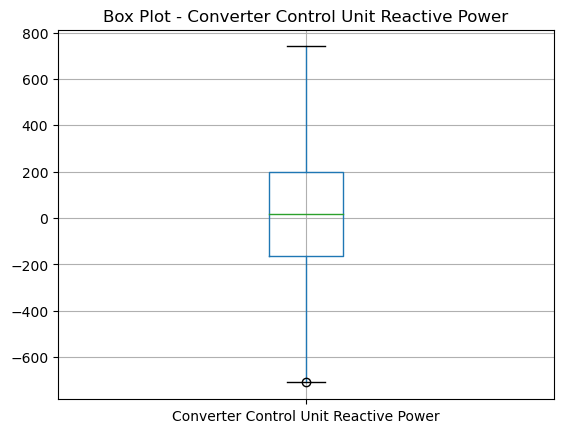

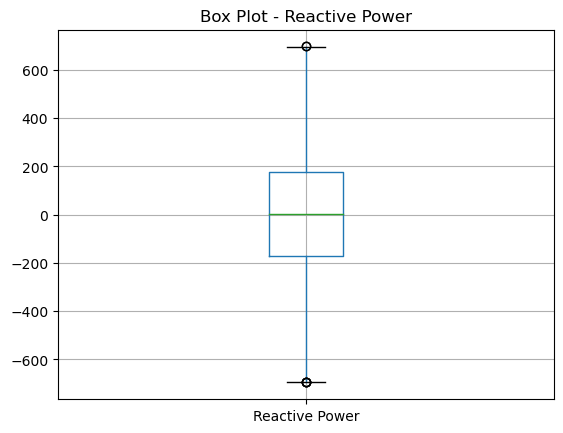

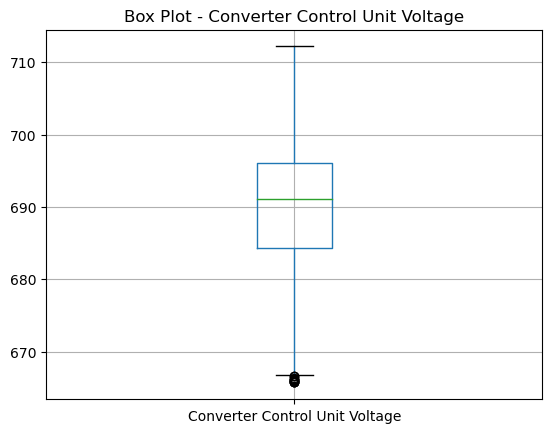

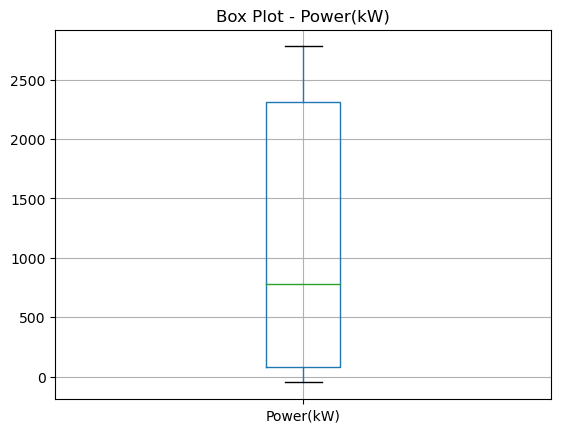

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_test1

# box plot for each column in the DataFrame
for column in df.columns:
    plt.figure()  # figure for each box plot
    df.boxplot(column=column)
    plt.title('Box Plot - {}'.format(column))
    plt.show()

In [47]:
#Random Forrest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_test1.drop('Power(kW)', axis=1)
y = df_test1['Power(kW)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  4274.54121038334
Mean Absolute Error (MAE):  11.35764425673161
R-squared (R2):  0.9963432522314972


Training Set:
Mean Squared Error (MSE):  581.6663823166665
Mean Absolute Error (MAE):  4.22879689009811
R-squared (R2):  0.9994992050376243

Testing Set:
Mean Squared Error (MSE):  4274.54121038334
Mean Absolute Error (MAE):  11.35764425673161
R-squared (R2):  0.9963432522314972


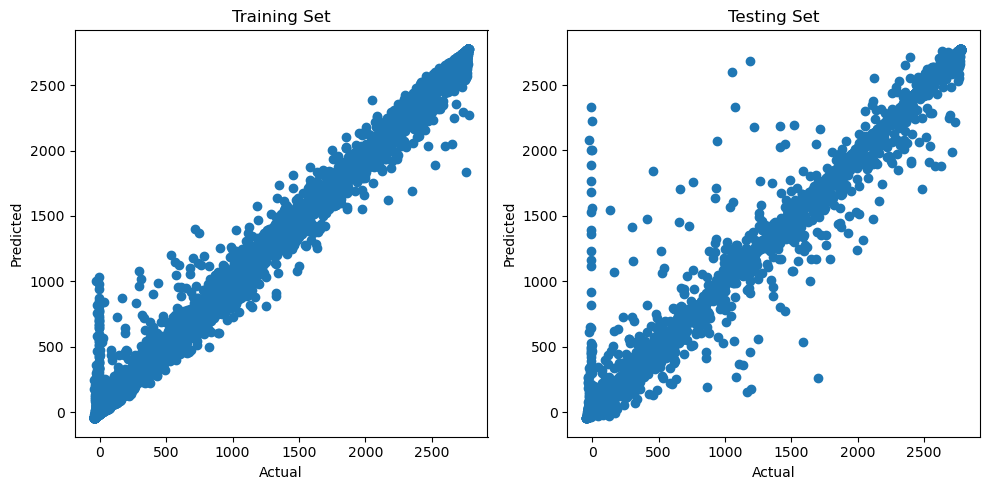

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X = df_test1.drop('Power(kW)', axis=1)
y = df_test1['Power(kW)']


#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Printing the evaluation metrics for training and testing datasets
print("Training Set:")
print("Mean Squared Error (MSE): ", mse_train)
print("Mean Absolute Error (MAE): ", mae_train)
print("R-squared (R2): ", r2_train)
print()
print("Testing Set:")
print("Mean Squared Error (MSE): ", mse_test)
print("Mean Absolute Error (MAE): ", mae_test)
print("R-squared (R2): ", r2_test)

# Plot predicted values vs actual values for both training and testing datasets
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set')
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Set')
plt.tight_layout()
plt.show()


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_test1.drop('Power(kW)', axis=1)
y = df_test1['Power(kW)']
# Split the data into training and validation/test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Evaluate the model on the validation/test data
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)

print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
r2 = r2_score(y_train, y_train_pred)
print(r2)

Training MSE: 131019.77496077547
Validation MSE: 127052.74521653856
0.8871964320670811


In [51]:
#Saving the Random Forrest Model

In [52]:
import pickle
with open('final_RF_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

In [53]:
with open('final_RF_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [54]:
#saving the Linear Regression model

In [55]:
import pickle
with open('final_LR_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [56]:
with open('final_LR_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [57]:
#saving the Lasso model

In [58]:
import pickle
with open('final_Lasso_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [59]:
with open('final_Lasso_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In conclusion, 
the accuracy of the Random forrest is 99.6%,
the accuracy of Lasso Regression is 89.1%,
the accuracy of the Gradient boosting is 96.4%.

In [61]:
import ast

with open('C:\Users\91812\Rishabh_Project\Wind Turbine Power Prediction.ipynb', 'r') as f:
    notebook_content = f.read()

notebook = ast.literal_eval(notebook_content)

used_libraries = set()

for cell in notebook['cells']:
    if cell['cell_type'] == 'code':
        source = cell['source']
        for line in source:
            if line.startswith('import') or line.startswith('from'):
                library = line.split()[1]
                used_libraries.add(library)

print(used_libraries)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (119851539.py, line 3)

In [ ]:
Wind Turbine Power Prediction.ipynb

In [62]:
import pkg_resources

installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(package.key, package.version)


diff-match-patch 20200713
certifi 2022.9.14
regex 2022.7.9
fsspec 2022.7.1
dask 2022.7.0
distributed 2022.7.0
pytz 2022.1
scikit-learn-intelex 2021.20221004.171935
imagecodecs 2021.8.26
tifffile 2021.7.2
daal4py 2021.6.0
pywin32 302
setuptools 63.4.1
cryptography 37.0.1
flatbuffers 23.5.9
keyring 23.4.0
pyzmq 23.2.0
conda 23.1.0
black 22.6.0
pip 22.2.2
twisted 22.2.0
pyopenssl 22.0.0
attrs 21.4.0
argon2-cffi 21.3.0
incremental 21.3.0
packaging 21.3
argon2-cffi-bindings 21.2.0
hyperlink 21.0.0
automat 20.2.0
service-identity 18.1.0
libclang 16.0.0
constantly 15.1.0
pillow 9.2.0
mysql-connector-python 8.0.32
click 8.0.4
tenacity 8.0.1
pycurl 7.45.1
ipython 7.31.1
ipywidgets 7.6.5
jupyter-client 7.3.4
pytest 7.1.2
ipykernel 6.15.2
notebook 6.4.12
nbconvert 6.4.4
jupyter-console 6.4.3
pydocstyle 6.1.1
tornado 6.1
pyyaml 6.0
isort 5.9.3
plotly 5.9.0
psutil 5.9.0
nbformat 5.5.0
ujson 5.4.0
zope.interface 5.4.0
qtconsole 5.2.2
spyder 5.2.2
smart-open 5.2.1
decorator 5.1.1
traitlets 5.1.1
astr